In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Demographic = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Raw_data/demographic_ospina_v2a.csv') 
# Procedures = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Raw_data/procedures_ospina_v2a.csv') 
# Diagnosis = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Raw_data/diagnosis_ospina_v2a.csv') 
# Encounter = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Raw_data/encounter_ospina_v2a.csv') 
# Vital = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Raw_data/vital_ospina_v2a.csv')
# Condition = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Raw_data/condition_ospina_v2a.csv') 
# address_history = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Raw_data/address_history_ospina_v2a.csv') 
# Denominator = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Adjusted.csv', dtype={'RACE': str}) 

# first_diag = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/first_diag.csv')
Demographic6 = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Demographic6.csv')
Demographic6_18month = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Demographic6_18month.csv')

In [4]:
# #For CCI
# Diagnosis['DX'] = Diagnosis['DX'].str.replace('.', '', regex=False)
# Diagnosis.to_csv('Diagnosis.csv')

In [5]:
Demographic6.columns

Index(['Unnamed: 0', 'ID', 'SEX', 'age', 'HISPANIC', 'RACE', 'CCI',
       'SVI_Person', 'RUCA1_Person', 'Insurance', 'RUCA1', 'RUCA2', 'RACE1',
       'HISPANIC1', 'RUCA', 'age_group', 'CCI1', 'RUCA_Person', 'SVI_Person2',
       'RPL_THEMES', 'Cancer', 'SVI'],
      dtype='object')

# 1.Report the counts for cohort

## A. Adult patients with first thyroid ultrasound + Thyroid Nodule Diagnosis 2015-2022

In [10]:
#Get the year of biopsy
Procedures['PX_YEAR'] = Procedures['PX_DATE'].str[-4:]
# Filter the DataFrame based on biopsy CPT
filtered_Procedures = Procedures[Procedures['PX'] == '76536']

# Get the index date - fisrt ultrasound
# Based on PxDATE, if there are missing in PX date use admit date. 
filtered_Procedures['DATE'] = filtered_Procedures['PX_DATE'].fillna(filtered_Procedures['ADMIT_DATE'])
# Convert the 'Date' column to datetime type
filtered_Procedures['DATE'] = pd.to_datetime(filtered_Procedures['DATE'])
filtered_Procedures = filtered_Procedures[filtered_Procedures['DATE']>='2015-01-01 00:00:00']
print(len(filtered_Procedures['ID'].unique()))

/tmp/ipykernel_50911/4240054274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Procedures['DATE'] = filtered_Procedures['PX_DATE'].fillna(filtered_Procedures['ADMIT_DATE'])


67238


/tmp/ipykernel_50911/4240054274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Procedures['DATE'] = pd.to_datetime(filtered_Procedures['DATE'])


In [11]:
#All patient in data
print(len(Procedures['ID'].unique()))

67238


## B. Patients with thyroid biopsy

In [12]:
# Filter the DataFrame based on biopsy CPT
filtered_Procedures1 = Procedures[Procedures['PX'] .isin(['60100','10022','10005','10006','10004','10021','60001','60300','76942'])]

# Based on PxDATE, if there are missing in PX date use admit date. 
filtered_Procedures1['DATE'] = filtered_Procedures1['PX_DATE'].fillna(filtered_Procedures1['ADMIT_DATE'])
# Convert the 'Date' column to datetime type
filtered_Procedures1['DATE'] = pd.to_datetime(filtered_Procedures1['DATE'])
filtered_Procedures1 = filtered_Procedures1[filtered_Procedures1['DATE']>='2015-01-01 00:00:00']

Biopsy_ID = filtered_Procedures1['ID'].unique()
print(len(Biopsy_ID))

/tmp/ipykernel_50911/367673275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Procedures1['DATE'] = filtered_Procedures1['PX_DATE'].fillna(filtered_Procedures1['ADMIT_DATE'])


16172


/tmp/ipykernel_50911/367673275.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Procedures1['DATE'] = pd.to_datetime(filtered_Procedures1['DATE'])


In [13]:
# Select the first date for each ID
first_dates1 = filtered_Procedures1.groupby('ID')['DATE'].min()

# Convert the result to a DataFrame
result_df1 = pd.DataFrame({'ID': first_dates1.index, 'First_Date': first_dates1.values})
result_df1

,ID,First_Date
0,2023SEP2520220218800000001,2020-12-01
1,2023SEP2520220218800000003,2018-07-03
2,2023SEP2520220218800000004,2021-04-07
3,2023SEP2520220218800000010,2021-01-15
4,2023SEP2520220218800000013,2019-12-13
...,...,...
16167,2023SEP2520220218800077378,2020-09-02
16168,2023SEP2520220218800077381,2022-01-20
16169,2023SEP2520220218800077382,2015-05-29
16170,2023SEP2520220218800077388,2021-10-12


## C. Patients with Thyroid Cancer diagnosis

In [14]:
#US_Nodule_ID = US_Nodule['ID'].unique()
US_Nodule_all =  Diagnosis[Diagnosis['ID'] .isin(Biopsy_ID)]

#Thyroid cancer diagnosis: 193 and C73
Thyroid_cancer = US_Nodule_all[US_Nodule_all['DX'] .isin(['193','C73','C739'])]
Thyroid_cancer_ID = Thyroid_cancer['ID'].unique()
print(len(Thyroid_cancer_ID))

1588


In [15]:
# Get the index date - fisrt biopsy
# Based on PxDATE, if there are missing in PX date use admit date. 
Thyroid_cancer['DATE'] = Thyroid_cancer['DX_DATE'].fillna(Thyroid_cancer['ADMIT_DATE'])

# Convert the 'Date' column to datetime type
Thyroid_cancer['DATE'] = pd.to_datetime(Thyroid_cancer['DATE'])

# Select the first date for each ID
first_dates2 = Thyroid_cancer.groupby('ID')['DATE'].min()

# Convert the result to a DataFrame
result_df2 = pd.DataFrame({'ID': first_dates2.index, 'First_Date': first_dates2.values})
result_df2

/tmp/ipykernel_50911/3484597889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thyroid_cancer['DATE'] = Thyroid_cancer['DX_DATE'].fillna(Thyroid_cancer['ADMIT_DATE'])
/tmp/ipykernel_50911/3484597889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thyroid_cancer['DATE'] = pd.to_datetime(Thyroid_cancer['DATE'])


,ID,First_Date
0,2023SEP2520220218800000004,2021-04-14
1,2023SEP2520220218800000022,2017-05-18
2,2023SEP2520220218800000116,2019-04-04
3,2023SEP2520220218800000125,2021-01-28
4,2023SEP2520220218800000178,2017-03-13
...,...,...
1583,2023SEP2520220218800077288,2021-11-19
1584,2023SEP2520220218800077315,2019-02-20
1585,2023SEP2520220218800077320,2018-05-15
1586,2023SEP2520220218800077322,2020-12-30


# 2.Outcome variables

## First date of diagnosis

In [16]:
# Select the first date for each ID
first_dates = filtered_Procedures.groupby('ID')['DATE'].min()

# Convert the result to a DataFrame
result_df = pd.DataFrame({'ID': first_dates.index, 'First_Date': first_dates.values})

first_diag = pd.merge(result_df,Demographic, on = 'ID',how = 'left') #Outer join? Because now all the differ date is 0 days
conditions = [
    first_diag['age']>=65,
    first_diag['age']<=39,
    first_diag['age'].isin(range(39,65)),
]
choices = ['>=65', '18-39','40-64']

first_diag['age_group'] = np.select(conditions, choices, default='Other')
first_diag['PX_YEAR'] = first_diag['First_Date'].dt.year

# Create a function to map the year and month to half-year intervals
def get_half_year(year, month):
    half_year = 'H1' if month <= 6 else 'H2'
    return f"{year}{half_year}"

# Apply the function to the 'DX_YEAR' column
first_diag['PX_YEAR_half'] = first_diag.apply(lambda row: get_half_year(row['PX_YEAR'], row['First_Date'].month), axis=1)

#Re-categorize variable
#Race
conditions = [
    first_diag['RACE'].isin(['01','04','OT']),
    first_diag['RACE'].isin(['07','NI','UN']),
    first_diag['RACE'].isin(['02']),
    first_diag['RACE'].isin(['03']),
    first_diag['RACE'].isin(['05']),
    first_diag['RACE'].isin(['06']),
]
choices = ['Other', 'Unknown','Asian','Black or African American','White','Multiple race']

first_diag['RACE1'] = np.select(conditions, choices, default='Other')

#first_diag.to_csv('first_diag.csv')
first_diag

,ID,First_Date,SEX,HISPANIC,RACE,zip5,age,site,age_group,PX_YEAR,PX_YEAR_half,RACE1
0,2023SEP2520220218800000001,2021-06-18,F,N,05,33008,45,Multiple,40-64,2021,2021H1,White
1,2023SEP2520220218800000002,2016-08-24,F,N,05,34448,32,Multiple,18-39,2016,2016H2,White
2,2023SEP2520220218800000003,2018-03-09,F,N,05,32744,75,Source6,>=65,2018,2018H1,White
3,2023SEP2520220218800000004,2021-03-12,M,N,05,32220,65,Source1,>=65,2021,2021H1,White
4,2023SEP2520220218800000005,2017-10-23,F,Y,05,33872,40,Multiple,40-64,2017,2017H2,White
...,...,...,...,...,...,...,...,...,...,...,...,...
67233,2023SEP2520220218800077392,2019-09-23,F,N,05,32922,60,Source6,40-64,2019,2019H2,White
67234,2023SEP2520220218800077393,2019-02-05,F,Y,UN,33014,68,Multiple,>=65,2019,2019H1,Unknown
67235,2023SEP2520220218800077394,2015-03-09,F,N,05,32218,46,Multiple,40-64,2015,2015H1,White
67236,2023SEP2520220218800077395,2020-02-13,F,N,05,32628,62,Multiple,40-64,2020,2020H1,White


In [17]:
#Model 1

#Import number of adult in OneFlorida by encounter year
Total_adult = pd.read_excel('/data2/datasets/Xingke/Thyroid_Biopsy/adult_by_year.xlsx')
#The number of adults who had their first thyroid Ultrasound in a given year
unique_counts_Ultrasound = first_diag.groupby('PX_YEAR')['ID'].nunique()
unique_counts_Ultrasound = unique_counts_Ultrasound.reset_index()
#The rate of Ultrasound from 2015 to 2022
unique_counts_Ultrasound.rename(columns={'ID': 'Ultrasound_count'}, inplace=True)
#unique_counts_Ultrasound = unique_counts_Ultrasound[1:].reset_index(drop=True)
unique_counts_Ultrasound['Rate'] = unique_counts_Ultrasound['Ultrasound_count']/ Total_adult['patient_count']
unique_counts_Ultrasound

,PX_YEAR,Ultrasound_count,Rate
0,2015,9962,0.004047
1,2016,10119,0.003856
2,2017,9828,0.003642
3,2018,9285,0.003438
4,2019,8617,0.003241
5,2020,7641,0.002867
6,2021,9279,0.003058
7,2022,2507,0.001096


## Sequetial analysis

In [18]:
#biopsy after ultrasound
#Index year: Ultrasound
biopsy_after = pd.merge(first_diag,first_dates1 , on = 'ID',how = 'left') #merge ultrasound date with biopsy date
biopsy_after['First_Date'] = pd.to_datetime(biopsy_after['First_Date']) #ultrasound date
biopsy_after['DATE'] = pd.to_datetime(biopsy_after['DATE']) #biopsy date
biopsy_after['differ'] = biopsy_after['DATE']-biopsy_after['First_Date']
biopsy_afterpatient = biopsy_after[biopsy_after['differ']>='0 days']
biopsy_afterpatient['Ultrasound_YEAR'] = biopsy_afterpatient['First_Date'].dt.year
biopsy_afterpatient = biopsy_afterpatient.rename(columns={'DATE': 'Biopsy date'})
print(len(biopsy_afterpatient))
unique_counts_biopsy2 = biopsy_afterpatient.groupby('Ultrasound_YEAR')['ID'].nunique()
unique_counts_biopsy2 = unique_counts_biopsy2.reset_index()
#unique_counts_biopsy2 =unique_counts_biopsy2[1:].reset_index(drop=True)
unique_counts_biopsy2['Rate'] = unique_counts_biopsy2['ID']/unique_counts_Ultrasound['Ultrasound_count']
unique_counts_biopsy2

14516


/tmp/ipykernel_50911/3324230102.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biopsy_afterpatient['Ultrasound_YEAR'] = biopsy_afterpatient['First_Date'].dt.year


,Ultrasound_YEAR,ID,Rate
0,2015,2451,0.246035
1,2016,2458,0.242909
2,2017,2347,0.238807
3,2018,2122,0.228541
4,2019,1821,0.211326
5,2020,1518,0.198665
6,2021,1530,0.164888
7,2022,269,0.107300


In [19]:
#biopsy after ultrasound
#Index year: biopsy
biopsy_after = pd.merge(first_diag,first_dates1 , on = 'ID',how = 'left') #merge ultrasound date with biopsy date
biopsy_after['First_Date'] = pd.to_datetime(biopsy_after['First_Date']) #ultrasound date
biopsy_after['DATE'] = pd.to_datetime(biopsy_after['DATE']) #biopsy date
biopsy_after['differ'] = biopsy_after['DATE']-biopsy_after['First_Date']
biopsy_afterpatient = biopsy_after[biopsy_after['differ']>='0 days']
biopsy_afterpatient['Biopsy_YEAR'] = biopsy_afterpatient['DATE'].dt.year
biopsy_afterpatient = biopsy_afterpatient.rename(columns={'DATE': 'Biopsy date'})
print(len(biopsy_afterpatient))
unique_counts_biopsy2 = biopsy_afterpatient.groupby('Biopsy_YEAR')['ID'].nunique()
unique_counts_biopsy2 = unique_counts_biopsy2.reset_index()
#unique_counts_biopsy2 =unique_counts_biopsy2[1:].reset_index(drop=True)
unique_counts_biopsy2['Rate'] = unique_counts_biopsy2['ID']/unique_counts_Ultrasound['Ultrasound_count']
unique_counts_biopsy2

14516


/tmp/ipykernel_50911/2883194142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biopsy_afterpatient['Biopsy_YEAR'] = biopsy_afterpatient['DATE'].dt.year


,Biopsy_YEAR,ID,Rate
0,2015,1389,0.139430
1,2016,1941,0.191817
2,2017,2190,0.222833
3,2018,2239,0.241142
4,2019,2031,0.235697
5,2020,1833,0.239890
6,2021,2126,0.229120
7,2022,767,0.305943


In [20]:
biopsy_after 

,ID,First_Date,SEX,HISPANIC,RACE,zip5,age,site,age_group,PX_YEAR,PX_YEAR_half,RACE1,DATE,differ
0,2023SEP2520220218800000001,2021-06-18,F,N,05,33008,45,Multiple,40-64,2021,2021H1,White,2020-12-01,-199 days
1,2023SEP2520220218800000002,2016-08-24,F,N,05,34448,32,Multiple,18-39,2016,2016H2,White,NaT,NaT
2,2023SEP2520220218800000003,2018-03-09,F,N,05,32744,75,Source6,>=65,2018,2018H1,White,2018-07-03,116 days
3,2023SEP2520220218800000004,2021-03-12,M,N,05,32220,65,Source1,>=65,2021,2021H1,White,2021-04-07,26 days
4,2023SEP2520220218800000005,2017-10-23,F,Y,05,33872,40,Multiple,40-64,2017,2017H2,White,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67233,2023SEP2520220218800077392,2019-09-23,F,N,05,32922,60,Source6,40-64,2019,2019H2,White,NaT,NaT
67234,2023SEP2520220218800077393,2019-02-05,F,Y,UN,33014,68,Multiple,>=65,2019,2019H1,Unknown,2019-02-05,0 days
67235,2023SEP2520220218800077394,2015-03-09,F,N,05,32218,46,Multiple,40-64,2015,2015H1,White,NaT,NaT
67236,2023SEP2520220218800077395,2020-02-13,F,N,05,32628,62,Multiple,40-64,2020,2020H1,White,NaT,NaT


In [21]:
# biopsy_after.to_csv('biopsydate.csv')

In [22]:
#cancer after biopsy
#Index year: biopsy
cancerafter = pd.merge(first_dates2,biopsy_afterpatient, on = 'ID',how = 'left')
cancerafter = cancerafter.rename(columns={'DATE': 'Cancer date'})
cancerafter['Cancer date'] = pd.to_datetime(cancerafter['Cancer date'])
cancerafter['Biopsy date'] = pd.to_datetime(cancerafter['Biopsy date'])
cancerafter['differ'] = cancerafter['Biopsy date']-cancerafter['Cancer date']
cancerafterpatient = cancerafter[cancerafter['differ']<='0 days']
cancerafterpatient['Biopsy_YEAR'] = cancerafterpatient['Biopsy date'].dt.year
print(len(cancerafterpatient))
unique_counts_cancer2 = cancerafterpatient.groupby('Biopsy_YEAR')['ID'].nunique()
unique_counts_cancer2 = unique_counts_cancer2.reset_index()
#unique_counts_cancer2['Rate'] = unique_counts_cancer2['ID']/unique_counts_biopsy['Biopsy_count']
unique_counts_cancer2

1383


/tmp/ipykernel_50911/2055204105.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancerafterpatient['Biopsy_YEAR'] = cancerafterpatient['Biopsy date'].dt.year


,Biopsy_YEAR,ID
0,2015,145
1,2016,208
2,2017,207
3,2018,214
4,2019,199
5,2020,177
6,2021,192
7,2022,41


In [23]:
cancerafter

,ID,Cancer date,First_Date,SEX,HISPANIC,RACE,zip5,age,site,age_group,PX_YEAR,PX_YEAR_half,RACE1,Biopsy date,differ,Biopsy_YEAR
0,2023SEP2520220218800000004,2021-04-14,2021-03-12,M,N,05,32220,65.0,Source1,>=65,2021.0,2021H1,White,2021-04-07,-7 days,2021.0
1,2023SEP2520220218800000022,2017-05-18,2017-03-15,F,UN,UN,32539,27.0,Source6,18-39,2017.0,2017H1,Unknown,2017-04-17,-31 days,2017.0
2,2023SEP2520220218800000116,2019-04-04,2018-09-25,F,UN,UN,33315,57.0,Source6,40-64,2018.0,2018H2,Unknown,2018-11-28,-127 days,2018.0
3,2023SEP2520220218800000125,2021-01-28,2020-08-03,F,N,05,32533,41.0,Source6,40-64,2020.0,2020H2,White,2020-09-08,-142 days,2020.0
4,2023SEP2520220218800000178,2017-03-13,2017-01-10,F,Y,05,33027,79.0,Multiple,>=65,2017.0,2017H1,White,2017-01-10,-62 days,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,2023SEP2520220218800077288,2021-11-19,2018-12-19,F,N,05,32092,33.0,Source1,18-39,2018.0,2018H2,White,2018-12-19,-1066 days,2018.0
1584,2023SEP2520220218800077315,2019-02-20,2016-05-17,F,Y,05,33172,63.0,Multiple,40-64,2016.0,2016H1,White,2019-02-20,0 days,2019.0
1585,2023SEP2520220218800077320,2018-05-15,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1586,2023SEP2520220218800077322,2020-12-30,2016-06-23,F,N,05,32218,53.0,Source1,40-64,2016.0,2016H1,White,2020-11-06,-54 days,2020.0


In [24]:
# cancerafter.to_csv('cancerdate.csv')

In [25]:
#cancer after biopsy
#Index year: cancer
cancerafter = pd.merge(first_dates2,biopsy_afterpatient, on = 'ID',how = 'left')
cancerafter = cancerafter.rename(columns={'DATE': 'Cancer date'})
cancerafter['Cancer date'] = pd.to_datetime(cancerafter['Cancer date'])
cancerafter['Biopsy date'] = pd.to_datetime(cancerafter['Biopsy date'])
cancerafter['differ'] = cancerafter['Biopsy date']-cancerafter['Cancer date']
cancerafterpatient = cancerafter[cancerafter['differ']<='0 days']
cancerafterpatient['Cancer_YEAR'] = cancerafterpatient['Cancer date'].dt.year
print(len(cancerafterpatient))
unique_counts_cancer2 = cancerafterpatient.groupby('Cancer_YEAR')['ID'].nunique()
unique_counts_cancer2 = unique_counts_cancer2.reset_index()
#unique_counts_cancer2['Rate'] = unique_counts_cancer2['ID']/unique_counts_biopsy['Biopsy_count']
unique_counts_cancer2

1383


/tmp/ipykernel_50911/1964276970.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancerafterpatient['Cancer_YEAR'] = cancerafterpatient['Cancer date'].dt.year


,Cancer_YEAR,ID
0,2015,98
1,2016,171
2,2017,195
3,2018,198
4,2019,217
5,2020,197
6,2021,227
7,2022,80


In [26]:
biopsy_afterID = biopsy_afterpatient['ID'].unique()
cancer_afterID = cancerafterpatient['ID'].unique()

In [27]:
# cancerafterpatient.to_csv('cancerafterpatient.csv')

In [28]:
# biopsy_afterpatient.to_csv('biopsyafterpatient.csv')

In [21]:
#After runing the model
Biopsy_18month = Demographic6_18month[Demographic6_18month['Biopsy_18month']  == 1]
Biopsy_18monthID = Biopsy_18month['ID'].unique()
Biopsy_18monthpt = biopsy_afterpatient[biopsy_afterpatient['ID'].isin(Biopsy_18monthID)]

Biopsy_18monthpt['Ultrasound_YEAR'] = Biopsy_18monthpt['First_Date'].dt.year
Biopsy_18monthpt = Biopsy_18monthpt.rename(columns={'DATE': 'Biopsy date'})
unique_counts_biopsy3 = Biopsy_18monthpt.groupby('Ultrasound_YEAR')['ID'].nunique()
unique_counts_biopsy3 = unique_counts_biopsy3.reset_index()
#unique_counts_biopsy3 =unique_counts_biopsy3[1:].reset_index(drop=True)
unique_counts_biopsy3['Rate'] = unique_counts_biopsy3['ID']/unique_counts_Ultrasound['Ultrasound_count']
unique_counts_biopsy3

NameError: name 'Demographic6_18month' is not defined

In [ ]:
#After runing the model
Biopsy_18month = Demographic6_18month1[Demographic6_18month1['Cancer_18month']  == 1]
Biopsy_18monthID = Biopsy_18month['ID'].unique()
Biopsy_18monthpt = biopsy_afterpatient[biopsy_afterpatient['ID'].isin(Biopsy_18monthID)]

Biopsy_18monthpt['Biopsy_YEAR'] = Biopsy_18monthpt['Biopsy date'].dt.year
Biopsy_18monthpt = Biopsy_18monthpt.rename(columns={'DATE': 'Biopsy date'})
unique_counts_cancer3 = Biopsy_18monthpt.groupby('Biopsy_YEAR')['ID'].nunique()
unique_counts_cancer3 = unique_counts_cancer3.reset_index()
#unique_counts_cancer3 =unique_counts_cancer3[1:].reset_index(drop=True)
unique_counts_cancer3['Rate'] = unique_counts_cancer3['ID']/unique_counts_Ultrasound['Ultrasound_count']
unique_counts_cancer3

# 2.Variables of interest

## Geocoded social determinants of health (SVI)

In [22]:
#Get the Rurality of each zip code
RUCA = pd.read_excel('RUCA2010zipcode.xlsx', sheet_name=1,dtype={0:float}) 
Rurality =  pd.merge(Encounter, RUCA, left_on = 'FACILITY_LOCATION', right_on = 'ZIP_CODE',how = 'left')
Rurality = Rurality.drop(columns=['ZIP_CODE','STATE','ZIP_TYPE'])

#Get the SVI of each county
SVI = pd.read_csv('SVI_2020_US_county.csv') 
#Convert county to zipcode
COUNTY_ZIP = pd.read_excel('ZIP_COUNTY_032023.xlsx')
SVI2 = pd.merge(SVI,COUNTY_ZIP,left_on = 'STCNTY',right_on = 'COUNTY',how = 'left')
SVI3 = SVI2[['ZIP','RPL_THEMES']].drop_duplicates(subset='ZIP', keep='first')

#Merge Rurality and SVI
Rurality_SVI = pd.merge(Rurality, SVI3, left_on = 'FACILITY_LOCATION', right_on = 'ZIP',how = 'left')
Rurality_SVI = Rurality_SVI.drop(columns=['ZIP'])

filtered_Procedures_new = filtered_Procedures[['ID', 'ENCOUNTERID','ADMIT_DATE','PX_DATE', 'PX' ]]
SVI1 = pd.merge(Rurality_SVI, filtered_Procedures_new, on = 'ENCOUNTERID',how = 'left')
SVI2 = SVI1[SVI1['PX'] == '76536' ]
SVI2.rename(columns={'ID_x': 'ID'}, inplace=True)

C:\Users\cashe\AppData\Local\Temp\ipykernel_30576\1011794062.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SVI2.rename(columns={'ID_x': 'ID'}, inplace=True)


In [23]:
#Personal zip code
Personzip =  pd.merge(address_history, RUCA, left_on = 'ADDRESS_ZIP5', right_on = 'ZIP_CODE',how = 'left')
Personzip = Personzip.drop(columns=['ZIP_CODE','STATE','ZIP_TYPE'])
Personzip = pd.merge(Personzip, SVI3, left_on = 'ADDRESS_ZIP5', right_on = 'ZIP',how = 'left')
Personzip = Personzip.drop(columns=['ZIP'])
Personzip

,ID,ADDRESSID,ADDRESS_USE,ADDRESS_TYPE,ADDRESS_PREFERRED,ADDRESS_CITY,ADDRESS_STATE,ADDRESS_ZIP5,ADDRESS_PERIOD_START,ADDRESS_PERIOD_END,site,RUCA1,RUCA2,RPL_THEMES
0,2023SEP2520220218800061682,av1Ocb0BSFY=,NI,NI,Y,Jacksonville,FL,32208.0,NaN,NaN,Source4,1.0,1.0,0.7973
1,2023SEP2520220218800061682,av1Ocb0BSVE=,NI,NI,Y,Jacksonville,FL,32208.0,NaN,NaN,Source4,1.0,1.0,0.7973
2,2023SEP2520220218800035323,av1Ocb0CT18=,NI,NI,Y,Homestead,FL,33032.0,NaN,NaN,Source4,1.0,1.0,0.9007
3,2023SEP2520220218800035323,av1Ocb0CT1E=,NI,NI,Y,Gainesville,FL,32607.0,NaN,NaN,Source4,1.0,1.0,0.6334
4,2023SEP2520220218800040922,av1Ocb0ET16r,NI,NI,Y,Miami,FL,33176.0,NaN,NaN,Source4,1.0,1.0,0.9007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867062,2023SEP2520220218800044705,YvJLc7gCTVWvrwK6f/Ef,HO,PH,Y,NaN,NaN,33134.0,01JUL2021,30SEP2021,Source6,1.0,1.0,0.9007
867063,2023SEP2520220218800020065,YvJLc7gCTVWvrwS+ePEf,HO,PH,Y,NaN,NaN,34772.0,01OCT2016,30SEP2021,Source6,1.0,1.1,0.8730
867064,2023SEP2520220218800065466,YvJLc7gCTVWvrwSwevEf,HO,PH,Y,NaN,NaN,32754.0,01OCT2016,30SEP2021,Source6,2.0,2.0,0.4707
867065,2023SEP2520220218800009951,YvJLc7gCTVWvrwy9e/Ec,HO,PH,Y,NaN,NaN,33012.0,01JUL2021,30SEP2021,Source6,1.0,1.0,0.9007


## Insurance

In [25]:
# Define the lambda function to assign values based on conditions in column PAYER_TYPE_PRIMARY
def assign_value(row):
    row = str(row['PAYER_TYPE_PRIMARY'])
    if row.startswith('1'):
        return 'MEDICARE'
    elif row.startswith('2'):
        return 'MEDICAID'
    elif row.startswith('3') or row.startswith('4'):
        return 'OtherGOV'
    elif row.startswith('5') or row.startswith('6'):
        return 'PRIVATE'
    elif row.startswith('8'):
        return 'NOPAY'
    elif row.startswith('7') or row.startswith('9') and row != '9999':
        return 'Other'
    elif row == 'OT':
        return 'Other'
    elif row == '9999':
        return 'Unknown'
    else:
        return 'Unknown'

# Apply the lambda function to assign values in column B
SVI2['Insurance'] = SVI2.apply(assign_value, axis=1)

SVI2

C:\Users\cashe\AppData\Local\Temp\ipykernel_30576\1472237171.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SVI2['Insurance'] = SVI2.apply(assign_value, axis=1)


,ID,ENCOUNTERID,ADMIT_DATE_x,DISCHARGE_DATE,FACILITY_LOCATION,ENC_TYPE,FACILITYID,DISCHARGE_DISPOSITION,DISCHARGE_STATUS,DRG,...,PROVIDER_SPECIALTY_PRIMARY,site,RUCA1,RUCA2,RPL_THEMES,ID_y,ADMIT_DATE_y,PX_DATE,PX,Insurance
14,2023SEP2520220218800021037,cfNPerwHTVasrwY=,18MAY2015,NaN,NaN,AV,NaN,NI,NI,NaN,...,NaN,Source2,NaN,NaN,0.8988,2023SEP2520220218800021037,18MAY2015,18MAY2015,76536,Unknown
94,2023SEP2520220218800028015,cfNPersDSVGpqgw=,09APR2015,NaN,NaN,AV,NaN,NI,NI,NaN,...,NaN,Source2,NaN,NaN,0.8988,2023SEP2520220218800028015,09APR2015,09APR2015,76536,Unknown
98,2023SEP2520220218800070554,cfNPersLTV+grww=,01MAY2015,NaN,NaN,AV,NaN,NI,NI,NaN,...,NaN,Source2,NaN,NaN,0.8988,2023SEP2520220218800070554,01MAY2015,01MAY2015,76536,Unknown
106,2023SEP2520220218800072143,cfNPerwDS1Svogw=,05MAY2015,NaN,NaN,AV,NaN,NI,NI,NaN,...,NaN,Source2,NaN,NaN,0.8988,2023SEP2520220218800072143,05MAY2015,05MAY2015,76536,Unknown
108,2023SEP2520220218800073039,cfNPerwASlWorAw=,07MAY2015,NaN,NaN,AV,NaN,NI,NI,NaN,...,NaN,Source2,NaN,NaN,0.8988,2023SEP2520220218800073039,07MAY2015,07MAY2015,76536,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13461170,2023SEP2520220218800074175,cfhOdbkDS1egrw==,28JUL2015,NaN,32610.0,AV,424,NaN,NaN,NaN,...,207Q00000X,Source1,1.0,1.0,0.6334,2023SEP2520220218800074175,28JUL2015,28JUL2015,76536,MEDICARE
13461203,2023SEP2520220218800074036,cfhOdLsDTVetqA==,19MAR2015,NaN,32610.0,AV,424,NaN,NaN,NaN,...,207Q00000X,Source1,1.0,1.0,0.6334,2023SEP2520220218800074036,19MAR2015,19MAR2015,76536,PRIVATE
13461211,2023SEP2520220218800028282,cfhOdLwHTl6tqg==,17JUN2015,NaN,32610.0,AV,424,NaN,NaN,NaN,...,207Q00000X,Source1,1.0,1.0,0.6334,2023SEP2520220218800028282,17JUN2015,17JUN2015,76536,PRIVATE
13461294,2023SEP2520220218800033348,cfhOerwDT1Sqqg==,11AUG2015,NaN,32610.0,AV,424,NaN,NaN,NaN,...,207Q00000X,Source1,1.0,1.0,0.6334,2023SEP2520220218800033348,11AUG2015,11AUG2015,76536,PRIVATE


In [26]:
#For facility zip
#Merge with first date of biopsy 
Encounter1 = pd.merge(result_df,SVI2,on = 'ID',how = 'left')
Encounter1['ADMIT_DATE_x'] = pd.to_datetime(Encounter1['ADMIT_DATE_x'])

#Find the Encounter date of the most recent date
Encounter1['differ'] = Encounter1['ADMIT_DATE_x'] - Encounter1['First_Date']
#Encounter1['differ2'] = Encounter1['differ'].abs()
#Encounter2 =  Encounter1.groupby('ID')['differ'].min().reset_index().merge(Encounter1, on=['ID', 'differ2'])

# Perform the groupby operation to get the minimum value for each ID
min_values = Encounter1.groupby('ID')['differ'].min().reset_index()
Encounter2 = min_values.merge(Encounter1, on=['ID', 'differ'], how='inner')
Encounter22 = Encounter2[Encounter2['differ']>='-180 days +21:00:00']

#right join???
Encounter3 = Encounter22[['ID','Insurance']].drop_duplicates(subset='ID',keep='first')
print(len(Encounter3 ['ID'].unique()))

Encounter4 = Encounter22[['ID','RUCA1','RUCA2','FACILITY_LOCATION']].drop_duplicates(subset='ID', keep='first')
print(len(Encounter4 ['ID'].unique()))

Encounter6 = Encounter22[['ID','RPL_THEMES']].drop_duplicates(subset='ID', keep='first')
print(len(Encounter6 ['ID'].unique()))

67236
67236
67236


In [27]:
Encounter3['Insurance'].value_counts()

MEDICAID    38827
MEDICARE    12114
Unknown      7557
PRIVATE      6421
OtherGOV     1877
NOPAY         388
Other          52
Name: Insurance, dtype: int64

In [28]:
Demographic6['RUCA'].value_counts()

NameError: name 'Demographic6' is not defined

In [ ]:
Encounter6['RPL_THEMES'].median()

In [29]:
#For personal zip
#Merge with first date of biopsy 
Personzip1 = pd.merge(result_df,Personzip,on = 'ID',how = 'left')
Personzip1['ADDRESS_PERIOD_START'] = pd.to_datetime(Personzip1['ADDRESS_PERIOD_START'])

#Find the Encounter date of the most recent date
Personzip1['differ'] = Personzip1['ADDRESS_PERIOD_START'] - Personzip1['First_Date']
Personzip1['differ2'] = Personzip1['differ'].abs()
Personzip2 =  Personzip1.groupby('ID')['differ2'].min().reset_index().merge(Personzip1, on=['ID', 'differ2'])

#right join???
Personzip3 = Personzip2[['ID','RPL_THEMES','ADDRESS_ZIP5']].drop_duplicates(subset='ID',keep='first')
print(len(Personzip3 ['ID'].unique()))

Personzip4 = Personzip2[['ID','RUCA1']].drop_duplicates(subset='ID',keep='first')
print(len(Personzip4 ['ID'].unique()))

Personzip4.rename(columns={'RUCA1': 'RUCA1_Person'}, inplace=True)
Personzip3.rename(columns={'RPL_THEMES': 'SVI_Person'}, inplace=True)

67238
67238


## Charlson comorbidity index

In [30]:
#Used Packages from Shuang to calculate CCI index
Commoridity = pd.read_csv('commoridity.csv')
Commoridity['CCI'] = Commoridity['AIDS']*6 + Commoridity['Any malignancy,includes leukemia and lympyoma']*2 +Commoridity['Cerebrovascular Disease']*1 +Commoridity['Chronic Pulmonary Disease']*1 +Commoridity['Congestive Heart Failure']*1 +Commoridity['Dementia']*1 +Commoridity['Diabetes']*1 +Commoridity['Diabetes with Chronic Complications']*2 +Commoridity['Hemiplegia or Paraplegia']*2 +Commoridity['Metastaic solid tumor']*6 +Commoridity['Mild Liver Disease']*1 +Commoridity['Moderate or Severe Liver Disease']*3 +Commoridity['Myocardial Infarction']*1 +Commoridity['Peptic Ulcer Disease']*1+Commoridity['Peripheral Vascular Disease']*1+Commoridity['Renal Disease']*2 +Commoridity['Rheumatologic Disease']*1
first_diag = pd.merge(first_diag,Commoridity,left_on = 'ID',right_on = 'PATID', how = 'left')
first_diag['CCI'] = first_diag['CCI'].fillna(0)

## BMI
At the time of biopsy; if missing then on the most recent visit.

In [31]:
#Clean the data for vital
Vital1 = Vital[['ID','MEASURE_DATE','ORIGINAL_BMI']]
Vital2 = Vital1.drop_duplicates()
Vital3 = Vital2.dropna(subset=['ORIGINAL_BMI'])
Vital3['First_Date'] = pd.to_datetime(Vital3['MEASURE_DATE'])

#Merge with first date of biopsy 
BMI1 = pd.merge(result_df,Vital3,on = 'ID',how = 'left')
BMI2 = BMI1.dropna(subset=['ORIGINAL_BMI'])

#Find the BMI of the most recent date
BMI2['differ'] = BMI2['First_Date_y'] - BMI2['First_Date_x']
BMI2['differ2'] = BMI2['differ'].abs()
first_date_rows =  BMI2.groupby('ID')['differ2'].min().reset_index().merge(BMI2, on=['ID', 'differ2'])
#right join???

#There are duplicate IDs, that is because the same day has multiple BMIs, so let's keep the first one
print(len(first_date_rows['ID'].unique()))
first_date_rows1 = first_date_rows.drop_duplicates(subset='ID', keep='first')
first_date_rows1

C:\Users\cashe\AppData\Local\Temp\ipykernel_30576\1611261830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vital3['First_Date'] = pd.to_datetime(Vital3['MEASURE_DATE'])
C:\Users\cashe\AppData\Local\Temp\ipykernel_30576\1611261830.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BMI2['differ'] = BMI2['First_Date_y'] - BMI2['First_Date_x']
C:\Users\cashe\AppData\Local\Temp\ipykernel_30576\1611261830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

30392


,ID,differ2,First_Date_x,MEASURE_DATE,ORIGINAL_BMI,First_Date_y,differ
0,2023SEP2520220218800000001,0 days,2021-06-18,18JUN2021,26.04,2021-06-18,0 days
1,2023SEP2520220218800000002,874 days,2016-08-24,15JAN2019,31.27,2019-01-15,874 days
2,2023SEP2520220218800000004,3 days,2021-03-12,09MAR2021,26.60,2021-03-09,-3 days
3,2023SEP2520220218800000008,68 days,2021-04-20,27JUN2021,26.52,2021-06-27,68 days
4,2023SEP2520220218800000009,6 days,2018-07-05,29JUN2018,38.23,2018-06-29,-6 days
...,...,...,...,...,...,...,...
31304,2023SEP2520220218800077388,161 days,2021-09-22,02MAR2022,24.63,2022-03-02,161 days
31305,2023SEP2520220218800077390,0 days,2019-12-16,16DEC2019,30.67,2019-12-16,0 days
31306,2023SEP2520220218800077393,1022 days,2019-02-05,19APR2016,26.93,2016-04-19,-1022 days
31307,2023SEP2520220218800077394,405 days,2015-03-09,28JAN2014,41.06,2014-01-28,-405 days


In [32]:
conditions = [
    first_date_rows1['ORIGINAL_BMI']<18.5,
    (first_date_rows1['ORIGINAL_BMI'] >= 18.5) & (first_date_rows1['ORIGINAL_BMI'] < 25),
    (first_date_rows1['ORIGINAL_BMI'] >= 25) & (first_date_rows1['ORIGINAL_BMI'] < 30),
    (first_date_rows1['ORIGINAL_BMI'] >= 30) & (first_date_rows1['ORIGINAL_BMI'] < 40),
    first_date_rows1['ORIGINAL_BMI']>= 40
]

choices = ['underweight', 'healthy range','overweight','obesity','severe obesity']

first_date_rows1['BMI_group'] = np.select(conditions, choices, default='UN')

first_date_rows1['BMI_group'].value_counts()

C:\Users\cashe\AppData\Local\Temp\ipykernel_30576\754440408.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_date_rows1['BMI_group'] = np.select(conditions, choices, default='UN')


obesity           9965
overweight        9375
healthy range     7639
severe obesity    2782
underweight        631
Name: BMI_group, dtype: int64

# Merge all the Table

In [33]:
#Merge with BMI
Demographic1 = pd.merge(first_diag,first_date_rows1,on = 'ID',how = 'left')
Demographic2 = pd.merge(Demographic1,Personzip3,on = 'ID',how = 'left')
Demographic2 = pd.merge(Demographic2,Personzip4,on = 'ID',how = 'left')
# Demographic2 = Demographic2[['ID','SEX','age','HISPANIC','RACE','CCI','SVI_Person','RUCA1_Person']]

#Merge with Insurance
Demographic3 = pd.merge(Demographic2,Encounter3,on = 'ID',how = 'left')

#Merge with rurality
Demographic5 = pd.merge(Demographic3,Encounter4,on = 'ID',how = 'left')

#Re-categorize variable
#Race
conditions = [
    Demographic5['RACE'].isin(['01','04','OT']),
    Demographic5['RACE'].isin(['07','NI','UN']),
    Demographic5['RACE'].isin(['02']),
    Demographic5['RACE'].isin(['03']),
    Demographic5['RACE'].isin(['05']),
    Demographic5['RACE'].isin(['06']),
]

choices = ['Other', 'Unknown','Asian','Black or African American','White','Multiple race']

Demographic5['RACE1'] = np.select(conditions, choices, default='Other')

#HISPANIC
conditions = [
    Demographic5['HISPANIC'].isin(['Y']),
    Demographic5['HISPANIC'].isin(['R','NI','UN']),
    Demographic5['HISPANIC'].isin(['N']),
]

choices = ['Yes', 'Unknown','No']

Demographic5['HISPANIC1'] = np.select(conditions, choices, default='Other')

#RUCA
#https://www.hrsa.gov/rural-health/about-us/what-is-rural
conditions = [
    Demographic5['RUCA1'].isin([1.0,2.0,3.0]),
    Demographic5['RUCA1'].isin([4.0,5.0,6.0,7.0,8.0,9.0,10.0]),
]

choices = ['Urban', 'Rural']

Demographic5['RUCA'] = np.select(conditions, choices, default='UN')

#Age
conditions = [
    (Demographic5['age'] >= 18) & (Demographic5['age'] < 40),
    (Demographic5['age'] >= 40) & (Demographic5['age'] <= 65),
    Demographic5['age']>65
]

choices = ['18-39', '40-64','>65']

Demographic5['age_group'] = np.select(conditions, choices, default='UN')

#CCI
conditions = [
    Demographic5['CCI'] == 0,
    Demographic5['CCI'].isin([1.0,2.0]),
    Demographic5['CCI'].isin([3.0,4.0]),
    Demographic5['age']>=5.0
]

choices = ['None', 'Mild','Moderate','Severe']

Demographic5['CCI1'] = np.select(conditions, choices, default='UN')

#RUCA_person
conditions = [
    Demographic5['RUCA1_Person'].isin([1.0,2.0,3.0]),
    Demographic5['RUCA1_Person'].isin([4.0,5.0,6.0,7.0,8.0,9.0,10.0]),
]

choices = ['Urban', 'Rural']

Demographic5['RUCA_Person'] = np.select(conditions, choices, default='UN')


#SVI
conditions = [
    Demographic5['SVI_Person']<=0.5,
    (Demographic5['SVI_Person'] > 0.50) & (Demographic5['SVI_Person'] <= 0.75),
    Demographic5['SVI_Person']>0.75
]

choices = ['<0.5', '0.5-0.75','>0.75']

Demographic5['SVI_Person2'] = np.select(conditions, choices, default='UN')

In [34]:
#Merge with SVI
Demographic6 = pd.merge(Demographic5,Encounter6,on = 'ID',how = 'left')

# Function to check if value is in list A
def check_presence(value):
    return 1 if value in cancer_afterID else 0

# Apply the function to create column B
Demographic6['Cancer'] = Demographic6['ID'].apply(lambda x: check_presence(x))

#SVI
conditions = [
    Demographic6['RPL_THEMES']<=0.5,
    (Demographic6['RPL_THEMES'] > 0.50) & (Demographic6['RPL_THEMES'] <= 0.75),
    Demographic6['RPL_THEMES']>0.75
]

choices = ['<0.5', '0.5-0.75','>0.75']

Demographic6['SVI'] = np.select(conditions, choices, default='UN')

# #Must delete them to avoid multi-colinear
# # Delete rows where value in sex is 'UN' (Only 1 people)
# Demographic6 = Demographic6.loc[Demographic5['SEX'] != 'UN']
# Demographic6 = Demographic6.loc[Demographic6['SVI'] != 'UN'] #only 4 people

# #SVI will not be in the model as category, don't delete
# Demographic6 = Demographic6.loc[Demographic6['RUCA_Person'] != 'UN']
# #Demographic6.to_csv('Demographic6.csv')

In [35]:
Demographic6.to_csv('Demographic6_withzip.csv')

# Time to cancer analysis

## Ultrasound to biopsy

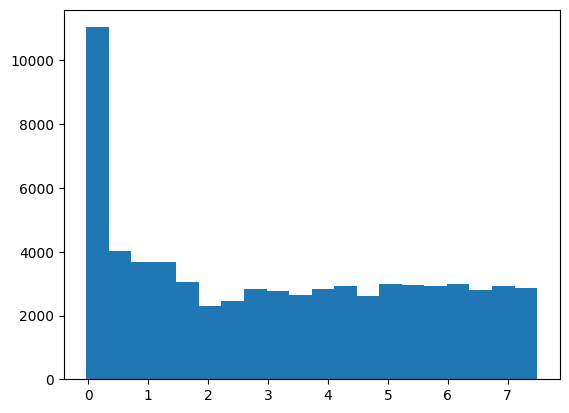

In [25]:
biopsy_afterpatient1 = biopsy_afterpatient[['ID','Biopsy date']]

first_diag2 =  pd.merge(first_diag,biopsy_afterpatient1, on = 'ID',how = 'left')
first_diag2['Biopsy date'] = first_diag2['Biopsy date'].fillna('2022-06-30')
#Calculate time to biopsy from first ultrasound
first_diag2['Time to survival']  = first_diag2['Biopsy date'] - first_diag2['First_Date']
#Make the columns numeric
first_diag2['Time to survival1']  = first_diag2['Time to survival'] / pd.Timedelta(days=1)
first_diag2['Time to survival2'] = first_diag2['Time to survival'] / pd.Timedelta(days=365.25)

# Function to check if value is in list A
def check_presence(value):
    return 1 if value in biopsy_afterID else 0

# Apply the function to create column B
first_diag2['Biopsy'] = first_diag2['ID'].apply(lambda x: check_presence(x))

plt.hist(first_diag2['Time to survival2'], bins = 20)
plt.show()

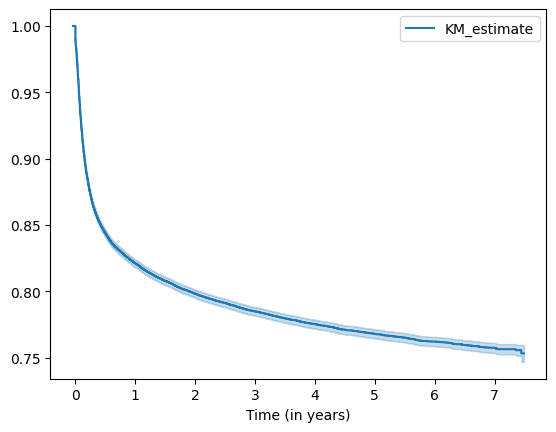

In [26]:
#For all the patients
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter() 
kmf.fit(durations = first_diag2['Time to survival2'], event_observed = first_diag2['Biopsy']) 
kmf.plot_survival_function()

# Add x-label
plt.xlabel('Time (in years)')

plt.show()


In [27]:
# # Define specific time points
# specific_time_points = [0,1, 2, 3, 4,5,6,7,8]

# # Initialize lists to store results
# at_risk = []
# events = []
# censors = []

# # Calculate number of people at risk and with events at each specific time point
# for time_point in specific_time_points:
#     at_risk_count = (first_diag2['Time to survival2'] > time_point).sum()
#     time_event = first_diag2[first_diag2['Time to survival2'] <= time_point]
#     event_count = (time_event['Biopsy']==1).sum()
#     censor_count = (time_event['Biopsy']==0).sum()
#     at_risk.append(at_risk_count)
#     events.append(event_count)
#     censors.append(censor_count)

# # Merge into a DataFrame
# summary_df = pd.DataFrame({'Time Point': specific_time_points, 'At Risk': at_risk, 'Events': events,'Censors': censors})
# summary_df.set_index('Time Point', inplace=True)

# summary_df

## Biopsy to cancer

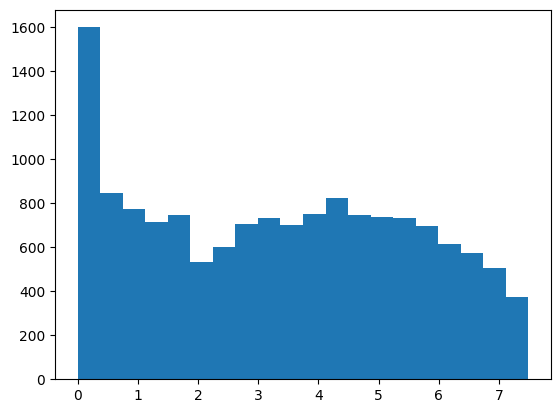

In [28]:
cancerafterpatient1 = cancerafterpatient[['ID','Cancer date']]
biopsy_afterpatient =  pd.merge(biopsy_afterpatient,cancerafterpatient1, on = 'ID',how = 'left')
biopsy_afterpatient['Cancer date'] = biopsy_afterpatient['Cancer date'].fillna('2022-06-30')
#Calculate time to cancer from first biopsy 
biopsy_afterpatient['Time to survival']  = biopsy_afterpatient['Cancer date'] - biopsy_afterpatient['Biopsy date']
#Make the columns numeric
biopsy_afterpatient['Time to survival1']  = biopsy_afterpatient['Time to survival'] / pd.Timedelta(days=1)
biopsy_afterpatient['Time to survival2'] = biopsy_afterpatient['Time to survival'] / pd.Timedelta(days=365.25)

# Function to check if value is in list A
def check_presence(value):
    return 1 if value in cancer_afterID else 0

# Apply the function to create column B
biopsy_afterpatient['Cancer'] = biopsy_afterpatient['ID'].apply(lambda x: check_presence(x))

plt.hist(biopsy_afterpatient['Time to survival2'], bins = 20)
plt.show()

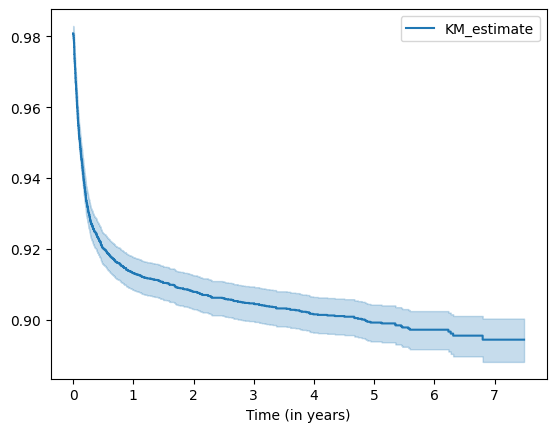

In [29]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter() 
kmf.fit(durations = biopsy_afterpatient['Time to survival2'], event_observed = biopsy_afterpatient['Cancer']) 
kmf.plot_survival_function()

# Add x-label
plt.xlabel('Time (in years)')

plt.show()


In [30]:
# # Define specific time points
# specific_time_points = [0,1, 2, 3, 4,5,6,7,8]

# # Initialize lists to store results
# at_risk = []
# events = []
# censors = []

# # Calculate number of people at risk and with events at each specific time point
# for time_point in specific_time_points:
#     at_risk_count = (biopsy_afterpatient['Time to survival2'] > time_point).sum()
#     time_event = biopsy_afterpatient[biopsy_afterpatient['Time to survival2'] <= time_point]
#     event_count = (time_event['Cancer']==1).sum()
#     censor_count = (time_event['Cancer']==0).sum()
#     at_risk.append(at_risk_count)
#     events.append(event_count)
#     censors.append(censor_count)

# # Merge into a DataFrame
# summary_df = pd.DataFrame({'Time Point': specific_time_points, 'At Risk': at_risk, 'Events': events,'Censors': censors})
# summary_df.set_index('Time Point', inplace=True)

# summary_df

## 18 month cut off

In [31]:
biopsy_afterpatient1 = biopsy_afterpatient[['ID','Biopsy date']]

first_diag2 =  pd.merge(biopsy_afterpatient1,first_diag, on = 'ID',how = 'left')
#Calculate time to biopsy from first ultrasound
first_diag2['Time to survival']  = first_diag2['Biopsy date'] - first_diag2['First_Date']
#Make the columns numeric
first_diag2['Time to survival1']  = first_diag2['Time to survival'] / pd.Timedelta(days=1)
first_diag2['Time to survival2'] = first_diag2['Time to survival'] / pd.Timedelta(days=365.25)

def check_presence(value):
    return 1 if value < 548 else 0
first_diag2['Biopsy_18month'] = first_diag2['Time to survival1'].apply(check_presence)
first_diag2 = first_diag2[['ID','Time to survival1','Biopsy_18month']]
first_diag2 = first_diag2.rename(columns={'Time to survival1': 'Time to survival_biopsy'})

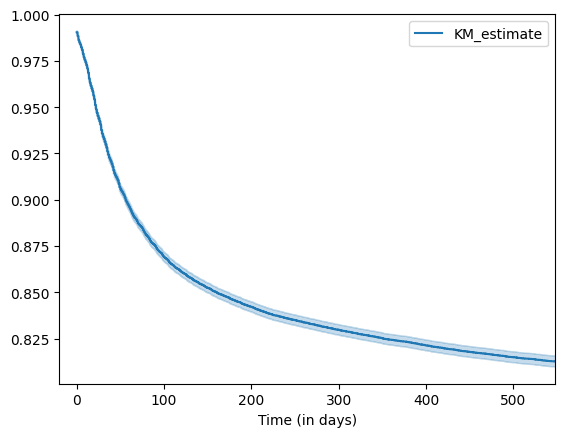

In [32]:
first_diag3 =  pd.merge(first_diag,first_diag2, on = 'ID',how = 'left')
first_diag3['Time to survival_biopsy'] = first_diag3['Time to survival_biopsy'].fillna(548.0)
first_diag3['Biopsy_18month'] = first_diag3['Biopsy_18month'].fillna(0)

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter() 
kmf.fit(durations = first_diag3['Time to survival_biopsy'], event_observed = first_diag3['Biopsy_18month']) 
kmf.plot_survival_function()

# Add x-label
plt.xlabel('Time (in days)')
plt.xlim(-20, 548)

plt.show()

In [33]:
# # Define specific time points
# specific_time_points = [0,100, 200, 300, 400,500]

# # Initialize lists to store results
# at_risk = []
# events = []
# censors = []

# # Calculate number of people at risk and with events at each specific time point
# for time_point in specific_time_points:
#     at_risk_count = (first_diag3['Time to survival_biopsy'] > time_point).sum()
#     time_event = first_diag3[first_diag3['Time to survival_biopsy'] <= time_point]
#     event_count = (time_event['Biopsy_18month']==1.0).sum()
#     censor_count = (time_event['Biopsy_18month']==0.0).sum()
#     at_risk.append(at_risk_count)
#     events.append(event_count)
#     censors.append(censor_count)

# # Merge into a DataFrame
# summary_df = pd.DataFrame({'Time Point': specific_time_points, 'At Risk': at_risk, 'Events': events,'Censors': censors})
# summary_df.set_index('Time Point', inplace=True)

# summary_df

In [34]:
first_diag_withcancer2 = biopsy_afterpatient[biopsy_afterpatient['ID'].isin(cancer_afterID)]
first_diag_withcancer2['Cancer_18month'] = first_diag_withcancer2['Time to survival1'].apply(check_presence)
first_diag_withcancer2 = first_diag_withcancer2[['ID','Time to survival1','Cancer_18month']]
first_diag_withcancer2 = first_diag_withcancer2.rename(columns={'Time to survival1': 'Time to survival_cancer'})

C:\Users\cashe\AppData\Local\Temp\ipykernel_22716\1865445445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_diag_withcancer2['Cancer_18month'] = first_diag_withcancer2['Time to survival1'].apply(check_presence)


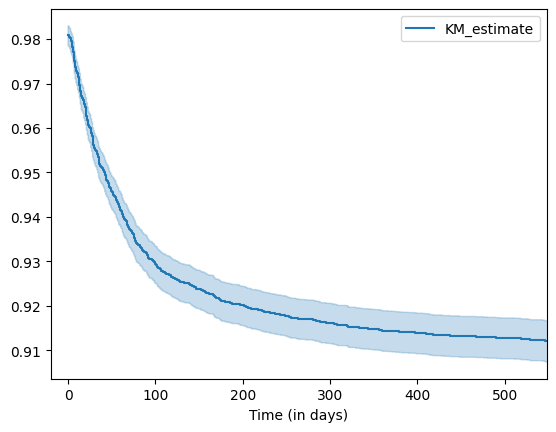

In [35]:
first_diag3 =  pd.merge(biopsy_afterpatient,first_diag_withcancer2, on = 'ID',how = 'left')
first_diag3['Time to survival_cancer'] = first_diag3['Time to survival_cancer'].fillna(548.0)
first_diag3['Cancer_18month'] = first_diag3['Cancer_18month'].fillna(0)

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter() 
kmf.fit(durations = first_diag3['Time to survival_cancer'], event_observed = first_diag3['Cancer_18month']) 
kmf.plot_survival_function()

# Add x-label
plt.xlabel('Time (in days)')
plt.xlim(-20, 548)

plt.show()

In [36]:
# # Define specific time points
# specific_time_points = [0,100, 200, 300, 400,500]

# # Initialize lists to store results
# at_risk = []
# events = []
# censors = []

# # Calculate number of people at risk and with events at each specific time point
# for time_point in specific_time_points:
#     at_risk_count = (first_diag3['Time to survival_cancer'] > time_point).sum()
#     time_event = first_diag3[first_diag3['Time to survival_cancer'] <= time_point]
#     event_count = (time_event['Cancer_18month']==1.0).sum()
#     censor_count = (time_event['Cancer_18month']==0.0).sum()
#     at_risk.append(at_risk_count)
#     events.append(event_count)
#     censors.append(censor_count)

# # Merge into a DataFrame
# summary_df = pd.DataFrame({'Time Point': specific_time_points, 'At Risk': at_risk, 'Events': events,'Censors': censors})
# summary_df.set_index('Time Point', inplace=True)

# summary_df

In [42]:
Demographic6_18month1 = pd.merge(Demographic6,first_diag_withcancer2, on = 'ID',how = 'left')
Demographic6_18month1['Cancer_18month'] = Demographic6_18month1['Cancer_18month'].fillna(0)
Demographic6_18month = pd.merge(Demographic6_18month1,first_diag2, on = 'ID',how = 'left')
Demographic6_18month['Biopsy_18month'] = Demographic6_18month['Biopsy_18month'].fillna(0)
print(len(Demographic6_18month1[Demographic6_18month1['Cancer_18month']  == 1]))
print(len(Demographic6_18month[Demographic6_18month['Biopsy_18month']  == 1]))

1276
12595


In [43]:
Demographic6_18month

,Unnamed: 0.1,Unnamed: 0,ID,SEX,age,HISPANIC,RACE,CCI,SVI_Person,RUCA1_Person,...,CCI1,RUCA_Person,SVI_Person2,RPL_THEMES,Cancer,SVI,Time to survival_cancer,Cancer_18month,Time to survival_biopsy,Biopsy_18month
0,0,0,2023SEP2520220218800000001,F,45,N,05,2.0,0.7826,1.0,...,Mild,Urban,>0.75,0.8988,0,>0.75,NaN,0.0,NaN,0.0
1,1,1,2023SEP2520220218800000002,F,32,N,05,2.0,0.5388,1.0,...,Mild,Urban,0.5-0.75,0.5388,0,0.5-0.75,NaN,0.0,NaN,0.0
2,2,2,2023SEP2520220218800000003,F,75,N,05,18.0,0.6579,1.0,...,Severe,Urban,0.5-0.75,0.6779,0,0.5-0.75,NaN,0.0,116.0,1.0
3,3,3,2023SEP2520220218800000004,M,65,N,05,16.0,0.7973,1.0,...,Severe,Urban,>0.75,0.7973,1,>0.75,7.0,1.0,26.0,1.0
4,4,4,2023SEP2520220218800000005,F,40,Y,05,2.0,0.8466,1.0,...,Mild,Urban,>0.75,0.8466,0,>0.75,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67233,67233,67233,2023SEP2520220218800077392,F,60,N,05,0.0,0.4707,1.0,...,None,Urban,<0.5,0.4707,0,<0.5,NaN,0.0,NaN,0.0
67234,67234,67234,2023SEP2520220218800077393,F,68,Y,UN,0.0,0.9007,1.0,...,None,Urban,>0.75,0.9007,0,>0.75,NaN,0.0,0.0,1.0
67235,67235,67235,2023SEP2520220218800077394,F,46,N,05,4.0,0.7973,1.0,...,Moderate,Urban,>0.75,0.7973,0,>0.75,NaN,0.0,NaN,0.0
67236,67236,67236,2023SEP2520220218800077395,F,62,N,05,10.0,0.7670,2.0,...,Severe,Urban,>0.75,0.6579,0,0.5-0.75,NaN,0.0,NaN,0.0


# Build the logistic model for aim 2

## Ultrasound to Biopsy

### Multivariate

In [10]:
Demographic6_18month = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Demographic6_18month.csv')

In [11]:
Demographic6_18month1 = Demographic6_18month 

In [12]:
Demographic6_18month = Demographic6_18month.loc[Demographic6_18month['SEX'] != 'UN']
Demographic6_18month = Demographic6_18month.loc[Demographic6_18month['Insurance'] != 'Other']
Demographic6_18month = Demographic6_18month.loc[Demographic6_18month['RUCA_Person'] != 'UN']

Demographic_final = Demographic6_18month.drop(columns=['Unnamed: 0','Unnamed: 0.1','Time to survival_cancer','Time to survival_biopsy', 'Cancer_18month','Cancer','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])

Demographic_final['RPL_THEMES1'] = pd.qcut(Demographic_final['RPL_THEMES'], q=4, labels=False)
Demographic_final['SVI_Person1'] = pd.qcut(Demographic_final['SVI_Person'], q=4, labels=False)

In [4]:
# Demographic6_18month = Demographic6 #VIF

#Delete rows where value in sex is 'UN' (Only 1 people)

Demographic6_18month = Demographic6_18month.loc[Demographic6_18month['SEX'] != 'UN']
Demographic6_18month = Demographic6_18month.loc[Demographic6_18month['Insurance'] != 'Other']
Demographic6_18month = Demographic6_18month.loc[Demographic6_18month['RUCA_Person'] != 'UN']

Demographic_final = Demographic6_18month.drop(columns=['Unnamed: 0','Unnamed: 0.1','Time to survival_cancer','Time to survival_biopsy', 'Cancer_18month','Cancer','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])

Demographic_final['RPL_THEMES1'] = pd.qcut(Demographic_final['RPL_THEMES'], q=4, labels=False)
Demographic_final['SVI_Person1'] = pd.qcut(Demographic_final['SVI_Person'], q=4, labels=False)

Demographic_final = Demographic_final.drop(columns=['RPL_THEMES','SVI_Person','RUCA_Person','RUCA'])

Demographic_final = Demographic_final.dropna()

#One hot encoding for categorical variables
Dummy = ['HISPANIC1','RACE1','SEX','Insurance','CCI1','RPL_THEMES1','SVI_Person1']


def convert_to_dummies(dataframe, variables):
    for variable in variables:
        if  variable == 'Insurance':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_MEDICAID'])
        elif variable == 'RACE1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_White'])
        elif variable == 'CCI1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_None'])
        elif variable == 'RPL_THEMES1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_3.0'])
        elif variable == 'SVI_Person1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_3.0'])
        elif variable == 'age':
            continue  # Skip further processing for these variables
        else:
            dummies = pd.get_dummies(dataframe[variable], prefix=variable, drop_first=True)
        
        if variable != 'age':
            dummies = dummies.astype(int)
            dataframe = pd.concat([dataframe, dummies], axis=1)
            dataframe.drop(columns=[variable], inplace=True)
    
    return dataframe

#VIF
# Demographic_final = Demographic6_18month.drop(columns=['Unnamed: 0','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])

Demographic_final_dummy = convert_to_dummies(Demographic_final, Dummy)
Demographic_final_dummy = Demographic_final_dummy.dropna()
Demographic_final_dummy

,age,Biopsy_18month,HISPANIC1_Other,HISPANIC1_Unknown,HISPANIC1_Yes,RACE1_Asian,RACE1_Black or African American,RACE1_Multiple race,RACE1_Other,RACE1_Unknown,...,Insurance_Unknown,CCI1_Mild,CCI1_Moderate,CCI1_Severe,RPL_THEMES1_0.0,RPL_THEMES1_1.0,RPL_THEMES1_2.0,SVI_Person1_0.0,SVI_Person1_1.0,SVI_Person1_2.0
0,45,0.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,32,0.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,75,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,65,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,40,0.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67233,60,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
67234,68,1.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
67235,46,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
67236,62,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [28]:
aa = Demographic_final[Demographic_final['RPL_THEMES1'] == 0.0]
aa['Biopsy_18month'].value_counts()/len(aa)

0.0    0.799624
1.0    0.200376
Name: Biopsy_18month, dtype: float64

In [30]:
aa['RPL_THEMES'].min()

0.035

In [31]:
aa['RPL_THEMES'].max()

0.7247

In [32]:
aa = Demographic_final[Demographic_final['RPL_THEMES1'] == 1.0]
aa['Biopsy_18month'].value_counts()/len(aa)

0.0    0.813759
1.0    0.186241
Name: Biopsy_18month, dtype: float64

In [33]:
aa['RPL_THEMES'].min()

0.7257

In [34]:
aa['RPL_THEMES'].max()

0.7973

In [35]:
aa = Demographic_final[Demographic_final['RPL_THEMES1'] == 2.0]
aa['Biopsy_18month'].value_counts()/len(aa)

0.0    0.780807
1.0    0.219193
Name: Biopsy_18month, dtype: float64

In [36]:
aa['RPL_THEMES'].min()

0.8011

In [37]:
aa['RPL_THEMES'].max()

0.8988

In [38]:
aa = Demographic_final[Demographic_final['RPL_THEMES1'] == 3.0]
aa['Biopsy_18month'].value_counts()/len(aa)

0.0    0.857143
1.0    0.142857
Name: Biopsy_18month, dtype: float64

In [39]:
aa['RPL_THEMES'].min()

0.8991

In [40]:
aa['RPL_THEMES'].max()

0.9959

In [5]:
Demographic7 = Demographic6_18month[['HISPANIC1','RACE1','SEX','Insurance','RUCA','SVI','age_group','CCI1','RUCA_Person','SVI_Person2']]

# Create an empty list to store tuples of (variable, level, count)
value_counts_list = []

# Iterate through each variable and calculate value_counts
for col in Demographic7:
    value_counts = pd.Series(Demographic7[col]).value_counts()
    for index, count in value_counts.items():
        value_counts_list.append((col, index, count))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(value_counts_list, columns=['Variable', 'Level', 'Count'])
value_counts_df['Percent'] = value_counts_df['Count']/67238

value_counts_df

,Variable,Level,Count,Percent
0,HISPANIC1,No,36416,0.541599
1,HISPANIC1,Yes,24113,0.358622
2,HISPANIC1,Unknown,4475,0.066555
3,HISPANIC1,Other,1834,0.027276
4,RACE1,White,34036,0.506202
5,RACE1,Black or African American,14030,0.208662
6,RACE1,Other,12551,0.186665
7,RACE1,Unknown,4542,0.067551
8,RACE1,Asian,1216,0.018085
9,RACE1,Multiple race,463,0.006886


In [6]:
#without Rurality
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
import statsmodels.api as sm
import researchpy as rp

# Split the data into training and testing sets
X = Demographic_final_dummy.drop(columns=['Biopsy_18month'])  # Input features
y = Demographic_final_dummy['Biopsy_18month']
#X = add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Convert summary to a DataFrame
summary_df = pd.DataFrame(result.summary().tables[1])

# Save the summary DataFrame to a CSV file
# summary_df.to_csv('logistic_model_summary_test.csv', index=False)

# Display model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.481321
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Biopsy_18month   No. Observations:                66745
Model:                          Logit   Df Residuals:                    66721
Method:                           MLE   Df Model:                           23
Date:                Thu, 15 Aug 2024   Pseudo R-squ.:                0.002074
Time:                        14:12:17   Log-Likelihood:                -32126.
converged:                       True   LL-Null:                       -32192.
Covariance Type:            nonrobust   LLR p-value:                 1.456e-17
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
age                                -0.0078      0.001    -12.599  

## VIF

In [72]:
# result.params

age                               -0.002993
SVI_Person                        -0.840526
RPL_THEMES                        -1.167487
HISPANIC1_Other                    0.070341
HISPANIC1_Unknown                 -0.049722
HISPANIC1_Yes                      0.060036
RACE1_Asian                        0.073977
RACE1_Black or African American   -0.090027
RACE1_Multiple race                0.135999
RACE1_Other                       -0.246728
RACE1_Unknown                     -0.004788
SEX_M                             -0.096783
Insurance_MEDICARE                -0.129706
Insurance_NOPAY                    0.208796
Insurance_OtherGOV                 0.094117
Insurance_PRIVATE                  0.077572
Insurance_Unknown                  0.367674
RUCA_Rural                         0.089202
RUCA_UN                            0.334479
CCI1_Mild                          0.283443
CCI1_Moderate                      0.454427
CCI1_Severe                        0.546126
RUCA_Person_Rural               

In [70]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm


# result = model.fit()

# # Now, get the covariance matrix from the fitted results
# cov = result.cov_params()

# # Calculate the correlation matrix
# corr = cov / np.outer(result.bse, result.bse)

# # Inverting the correlation matrix gives us variance inflation factors on the diagonal
# vif = np.diag(np.linalg.inv(corr))

# # We can put this into a DataFrame for a better presentation
# vif_df = pd.DataFrame({
#     'Variable': X.columns,
#     'VIF': vif
# })

# print(vif_df)


Optimization terminated successfully.
         Current function value: 0.477457
         Iterations 6
                           Variable        VIF
0                               age  11.545005
1                        SVI_Person  35.371377
2                        RPL_THEMES  36.893819
3                   HISPANIC1_Other   1.298132
4                 HISPANIC1_Unknown   5.554053
5                     HISPANIC1_Yes   2.980702
6                       RACE1_Asian   1.127475
7   RACE1_Black or African American   1.590840
8               RACE1_Multiple race   1.023143
9                       RACE1_Other   1.956404
10                    RACE1_Unknown   5.523539
11                            SEX_M   1.225542
12               Insurance_MEDICARE   1.771083
13                  Insurance_NOPAY   1.019673
14               Insurance_OtherGOV   1.453157
15                Insurance_PRIVATE   1.362682
16                Insurance_Unknown   4.185477
17                       RUCA_Rural   1.240907
18   

In [73]:
# Demographic_final_dummy.corr()

,age,SVI_Person,RPL_THEMES,Biopsy_18month,HISPANIC1_Other,HISPANIC1_Unknown,HISPANIC1_Yes,RACE1_Asian,RACE1_Black or African American,RACE1_Multiple race,...,Insurance_NOPAY,Insurance_OtherGOV,Insurance_PRIVATE,Insurance_Unknown,RUCA_Rural,RUCA_UN,CCI1_Mild,CCI1_Moderate,CCI1_Severe,RUCA_Person_Rural
age,1.000000,0.049780,0.060802,0.025711,-0.022733,0.169184,-0.051831,0.009611,-0.041308,0.010643,...,-0.003498,0.021163,-0.058679,0.057364,-0.004462,0.086720,0.043283,0.175711,0.255959,0.009875
SVI_Person,0.049780,1.000000,0.570038,-0.016277,-0.034805,0.042356,0.321779,-0.030871,-0.017938,0.022971,...,0.005295,0.067473,-0.120704,0.184426,0.032135,0.263874,-0.030074,-0.008962,-0.005381,0.034482
RPL_THEMES,0.060802,0.570038,1.000000,-0.010359,-0.042296,0.044728,0.321392,-0.031563,-0.047241,0.024116,...,0.008967,0.094418,-0.099736,0.276860,0.060050,0.379515,-0.034201,-0.017252,-0.010410,-0.073860
Biopsy_18month,0.025711,-0.016277,-0.010359,1.000000,-0.008075,-0.009493,-0.020444,0.010455,0.002500,0.005955,...,0.004503,0.008997,0.016890,0.062928,0.000479,0.055293,0.022411,0.028672,0.045433,0.013702
HISPANIC1_Other,-0.022733,-0.034805,-0.042296,-0.008075,1.000000,-0.045005,-0.126219,0.228789,-0.082542,-0.011783,...,-0.012800,-0.028412,-0.054451,-0.058054,-0.002775,-0.074281,-0.013584,-0.011069,-0.032538,-0.015947
HISPANIC1_Unknown,0.169184,0.042356,0.044728,-0.009493,-0.045005,1.000000,-0.201163,-0.031983,-0.130943,-0.016513,...,-0.020399,-0.041634,-0.063268,-0.058835,0.006932,-0.079598,0.043878,0.064936,0.023481,-0.015842
HISPANIC1_Yes,-0.051831,0.321779,0.321392,-0.020444,-0.126219,-0.201163,1.000000,-0.092708,-0.345607,0.060750,...,-0.043204,0.092613,-0.103150,0.126637,-0.054559,0.201648,-0.035739,-0.052786,-0.088862,-0.103013
RACE1_Asian,0.009611,-0.030871,-0.031563,0.010455,0.228789,-0.031983,-0.092708,1.000000,-0.070168,-0.011343,...,0.007387,-0.008705,0.065182,0.013036,-0.010492,0.002037,-0.009923,-0.000129,-0.021494,-0.015266
RACE1_Black or African American,-0.041308,-0.017938,-0.047241,0.002500,-0.082542,-0.130943,-0.345607,-0.070168,1.000000,-0.042928,...,0.047235,0.004649,0.025255,-0.046737,0.005646,-0.021920,-0.008807,0.016109,0.087240,-0.005630
RACE1_Multiple race,0.010643,0.022971,0.024116,0.005955,-0.011783,-0.016513,0.060750,-0.011343,-0.042928,1.000000,...,0.000829,-0.008576,0.013149,0.011935,-0.007859,0.009336,-0.004742,0.000568,0.002846,-0.012091


In [63]:
def create_variable_dataframes(df, excel_filename):
    # Get the column names
    column_names = df.columns.tolist()
    column_names.remove('Biopsy_18month')
    
    # Create an empty DataFrame to store results
    result_df = pd.DataFrame()
    
    # Iterate through the variables of interest
    for column_name in column_names:
        # Create a new dataframe for the variable with the event and time-to-survival columns
        variable_df = pd.DataFrame({
            column_name: df[column_name],
            'Biopsy_18month': df['Biopsy_18month']
        })
        
        # Convert specific variables to dummy variables while dropping categories
        variables_to_convert = [column_name]  # Add more variables if needed
        Demographic_final_dummy = convert_to_dummies(variable_df, variables_to_convert)
        Demographic_final_dummy = Demographic_final_dummy.dropna()

        # Split the data into training and testing sets
        X = Demographic_final_dummy.drop(columns=['Biopsy_18month']) 
        y = Demographic_final_dummy['Biopsy_18month']
        X = add_constant(X)

        # Fit logistic regression model
        model = sm.Logit(y, X)
        result = model.fit()

        # Store model results in the master DataFrame
        model_summary = pd.DataFrame(result.summary().tables[1])
        model_summary['Variable'] = column_name  # Add a column for the variable name
        result_df = pd.concat([result_df, model_summary])
    
    # Save the master DataFrame to an Excel file
    result_df.to_excel(excel_filename, index=False)

# Call the function to create the single DataFrame with all model results
create_variable_dataframes(Demographic_final, 'logistic1.xlsx')


Optimization terminated successfully.
         Current function value: 0.482311
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.481999
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.480008
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.480594
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.481944
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.479634
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479938
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.481923
         Iterations 5


## Biopsy to cancer

### Multivariate

In [79]:
Demographic6_18month2 = Demographic6_18month[Demographic6_18month['ID'].isin(biopsy_afterID)]
Demographic6_18month2 = Demographic6_18month2.loc[Demographic6_18month2['RUCA_Person'] != 'UN']
Demographic_final = Demographic6_18month2.drop(columns=['Unnamed: 0','Unnamed: 0.1','Time to survival_cancer','Time to survival_biopsy','Cancer','Biopsy_18month','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])

Demographic_final['RPL_THEMES1'] = pd.qcut(Demographic_final['RPL_THEMES'], q=4, labels=False)
Demographic_final['SVI_Person1'] = pd.qcut(Demographic_final['SVI_Person'], q=4, labels=False)

Demographic_final = Demographic_final.drop(columns=['RPL_THEMES','SVI_Person','RUCA_Person','RUCA'])

Demographic_final = Demographic_final.dropna()

#VIF
# Demographic_final = Demographic6_18month.drop(columns=['Unnamed: 0','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])

def convert_to_dummies(dataframe, variables):
    for variable in variables:
        if  variable == 'Insurance':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_MEDICAID'])
        elif variable == 'RACE1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_White'])
        elif variable == 'CCI1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_None'])
        elif variable == 'RPL_THEMES1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_3'])
        elif variable == 'SVI_Person1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_3.0'])
        elif variable == 'age':
            continue  # Skip further processing for these variables
        else:
            dummies = pd.get_dummies(dataframe[variable], prefix=variable, drop_first=True)
        
        if variable != 'age':
            dummies = dummies.astype(int)
            dataframe = pd.concat([dataframe, dummies], axis=1)
            dataframe.drop(columns=[variable], inplace=True)
    
    return dataframe

Demographic_final_dummy = convert_to_dummies(Demographic_final, Dummy)
Demographic_final_dummy = Demographic_final_dummy.dropna()

Demographic7 = Demographic6_18month2[['HISPANIC1','RACE1','SEX','Insurance','RUCA','SVI','age_group','CCI1','RUCA_Person','SVI_Person2']]

# Create an empty list to store tuples of (variable, level, count)
value_counts_list = []

# Iterate through each variable and calculate value_counts
for col in Demographic7:
    value_counts = pd.Series(Demographic7[col]).value_counts()
    for index, count in value_counts.items():
        value_counts_list.append((col, index, count))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(value_counts_list, columns=['Variable', 'Level', 'Count'])
value_counts_df['Percent'] = value_counts_df['Count']/67238

#value_counts_df.to_csv('value_counts.csv')
value_counts_df

Demographic_final_dummy

,age,Cancer_18month,HISPANIC1_Other,HISPANIC1_Unknown,HISPANIC1_Yes,RACE1_Asian,RACE1_Black or African American,RACE1_Multiple race,RACE1_Other,RACE1_Unknown,...,Insurance_Unknown,CCI1_Mild,CCI1_Moderate,CCI1_Severe,RPL_THEMES1_0,RPL_THEMES1_1,RPL_THEMES1_2,SVI_Person1_0.0,SVI_Person1_1.0,SVI_Person1_2.0
2,75,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,65,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
8,61,0.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
10,61,0.0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
11,71,0.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67220,38,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
67223,37,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
67224,28,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
67230,67,0.0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1


In [80]:
# Split the data into training and testing sets
X = Demographic_final_dummy.drop(columns=['Cancer_18month'])  # Input features
y = Demographic_final_dummy['Cancer_18month']
#X = add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Convert summary to a DataFrame
summary_df = pd.DataFrame(result.summary().tables[1])

# Save the summary DataFrame to a CSV file
# summary_df.to_csv('logistic_model_summary2.csv', index=False)

# Display model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.255719
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Cancer_18month   No. Observations:                14415
Model:                          Logit   Df Residuals:                    14391
Method:                           MLE   Df Model:                           23
Date:                Wed, 14 Aug 2024   Pseudo R-squ.:                  0.1399
Time:                        15:17:01   Log-Likelihood:                -3686.2
converged:                       True   LL-Null:                       -4285.8
Covariance Type:            nonrobust   LLR p-value:                4.999e-239
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
age                                -0.0574      0.002    -25.599  

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming 'X' and 'y' have been defined as before:
X = sm.add_constant(X)  # Adding a constant is important for VIF calculation
model = sm.Logit(y, X)
result = model.fit()

# Now, get the covariance matrix from the fitted results
cov = result.cov_params()

# Calculate the correlation matrix
corr = cov / np.outer(result.bse, result.bse)

# Inverting the correlation matrix gives us variance inflation factors on the diagonal
vif = np.diag(np.linalg.inv(corr))

# We can put this into a DataFrame for a better presentation
vif_df = pd.DataFrame({
    'Variable': X.columns,
    'VIF': vif
})

print(vif_df)


Optimization terminated successfully.
         Current function value: 0.251390
         Iterations 8
                           Variable        VIF
0                             const  72.240380
1                        Unnamed: 0   3.835484
2                               age  16.634276
3                        SVI_Person  51.987079
4                        RPL_THEMES  64.337315
5                   HISPANIC1_Other   1.208664
6                 HISPANIC1_Unknown   3.983827
7                     HISPANIC1_Yes   3.180732
8                       RACE1_Asian   1.115673
9   RACE1_Black or African American   1.347768
10              RACE1_Multiple race   1.024086
11                      RACE1_Other   1.662228
12                    RACE1_Unknown   3.955509
13                            SEX_M   1.298071
14               Insurance_MEDICARE   1.481767
15                  Insurance_NOPAY   1.018613
16               Insurance_OtherGOV   1.195559
17                Insurance_PRIVATE   1.336722
18   

In [68]:
def create_variable_dataframes(df, excel_filename):
    # Get the column names
    column_names = df.columns.tolist()
    column_names.remove('Cancer_18month')
    
    # Create an empty DataFrame to store results
    result_df = pd.DataFrame()
    
    # Iterate through the variables of interest
    for column_name in column_names:
        # Create a new dataframe for the variable with the event and time-to-survival columns
        variable_df = pd.DataFrame({
            column_name: df[column_name],
            'Cancer_18month': df['Cancer_18month']
        })
        
        # Convert specific variables to dummy variables while dropping categories
        variables_to_convert = [column_name]  # Add more variables if needed
        Demographic_final_dummy = convert_to_dummies(variable_df, variables_to_convert)
        Demographic_final_dummy = Demographic_final_dummy.dropna()

        # Split the data into training and testing sets
        X = Demographic_final_dummy.drop(columns=['Cancer_18month']) 
        y = Demographic_final_dummy['Cancer_18month']
        X = add_constant(X)

        # Fit logistic regression model
        model = sm.Logit(y, X)
        result = model.fit()

        # Store model results in the master DataFrame
        model_summary = pd.DataFrame(result.summary().tables[1])
        model_summary['Variable'] = column_name  # Add a column for the variable name
        result_df = pd.concat([result_df, model_summary])
    
    # Save the master DataFrame to an Excel file
    result_df.to_excel(excel_filename, index=False)

# Call the function to create the single DataFrame with all model results
create_variable_dataframes(Demographic_final, 'logistic2.xlsx')

Optimization terminated successfully.
         Current function value: 0.296842
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.293995
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295342
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295357
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274716
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295737
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296438
         Iterations 7


# Linear regression

In [34]:
Demographic6_18month = pd.read_csv('/data2/datasets/Xingke/Thyroid_Biopsy/Demographic6_18month.csv')

In [35]:
Demographic6_18month = Demographic6_18month.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [36]:
Demographic6_18month1 = Demographic6_18month

## Ultrasound to biopsy

In [64]:
# Demographic6_18month.to_csv('Demographic6_18month.csv')

In [81]:
Demographic6_biopsy = Demographic6_18month[Demographic6_18month['Cancer_18month']  == 1]

In [82]:
Demographic6_biopsy

,Unnamed: 0.1,Unnamed: 0,ID,SEX,age,HISPANIC,RACE,CCI,SVI_Person,RUCA1_Person,...,CCI1,RUCA_Person,SVI_Person2,RPL_THEMES,Cancer,SVI,Time to survival_cancer,Cancer_18month,Time to survival_biopsy,Biopsy_18month
3,3,3,2023SEP2520220218800000004,M,65,N,05,16.0,0.7973,1.0,...,Severe,Urban,>0.75,0.7973,1,>0.75,7.0,1.0,26.0,1.0
18,18,18,2023SEP2520220218800000022,F,27,UN,UN,2.0,0.5385,2.0,...,Mild,Urban,0.5-0.75,0.4640,1,<0.5,31.0,1.0,33.0,1.0
100,100,100,2023SEP2520220218800000116,F,57,UN,UN,8.0,0.7826,1.0,...,Severe,Urban,>0.75,0.7826,1,>0.75,127.0,1.0,64.0,1.0
108,108,108,2023SEP2520220218800000125,F,41,N,05,2.0,0.7502,1.0,...,Mild,Urban,>0.75,0.7973,1,>0.75,142.0,1.0,36.0,1.0
156,156,156,2023SEP2520220218800000178,F,79,Y,05,6.0,0.7826,1.0,...,Severe,Urban,>0.75,0.7826,1,>0.75,62.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66910,66910,66910,2023SEP2520220218800077025,F,68,Y,05,2.0,0.9007,1.0,...,Mild,Urban,>0.75,0.8988,1,>0.75,0.0,1.0,31.0,1.0
67080,67080,67080,2023SEP2520220218800077225,F,50,Y,05,0.0,0.9007,1.0,...,None,Urban,>0.75,0.8988,1,>0.75,210.0,1.0,22.0,1.0
67097,67097,67097,2023SEP2520220218800077245,M,65,N,05,8.0,0.7330,1.0,...,Severe,Urban,0.5-0.75,0.6334,1,0.5-0.75,0.0,1.0,21.0,1.0
67158,67158,67158,2023SEP2520220218800077315,F,63,Y,05,11.0,0.9007,1.0,...,Severe,Urban,>0.75,0.8988,1,>0.75,0.0,1.0,1009.0,0.0


In [83]:
Demographic6_biopsy['Time to survival_cancer'].mean()

66.84779179810725

In [84]:
Demographic6_biopsy['Time to survival_cancer'].std()

97.20362285748203

In [85]:
Demographic6_biopsy['Time to survival_cancer'].min()

0.0

In [86]:
Demographic6_biopsy['Time to survival_cancer'].quantile([0.25, 0.5, 0.75])

0.25     6.0
0.50    30.0
0.75    80.0
Name: Time to survival_cancer, dtype: float64

In [87]:
Demographic6_biopsy = Demographic6_18month[Demographic6_18month['Biopsy_18month']  == 1]
Demographic_final = Demographic6_biopsy.drop(columns=['Unnamed: 0','Unnamed: 0.1','Time to survival_cancer','Cancer_18month','Biopsy_18month','Cancer','Biopsy_18month','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])

Demographic_final['RPL_THEMES1'] = pd.qcut(Demographic_final['RPL_THEMES'], q=4, labels=False)
Demographic_final['SVI_Person1'] = pd.qcut(Demographic_final['SVI_Person'], q=4, labels=False)

Demographic_final = Demographic_final.drop(columns=['RPL_THEMES','SVI_Person','RUCA_Person','RUCA'])

Demographic_final = Demographic_final.dropna()

#VIF
# Demographic_final = Demographic6_18month.drop(columns=['Unnamed: 0','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])

def convert_to_dummies(dataframe, variables):
    for variable in variables:
        if  variable == 'Insurance':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_MEDICAID'])
        elif variable == 'RACE1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_White'])
        elif variable == 'CCI1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_None'])
        elif variable == 'RPL_THEMES1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_3'])
        elif variable == 'SVI_Person1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_3.0'])
        elif variable == 'age':
            continue  # Skip further processing for these variables
        else:
            dummies = pd.get_dummies(dataframe[variable], prefix=variable, drop_first=True)
        
        if variable != 'age':
            dummies = dummies.astype(int)
            dataframe = pd.concat([dataframe, dummies], axis=1)
            dataframe.drop(columns=[variable], inplace=True)
    
    return dataframe

Demographic_final_dummy = convert_to_dummies(Demographic_final, Dummy)
Demographic_final_dummy = Demographic_final_dummy.dropna()


# Split the data into training and testing sets
X = Demographic_final_dummy.drop(columns=['Time to survival_biopsy'])  # Input features
# Assuming 'Time to survival_biopsy' is non-negative
# Demographic_final_dummy['log_Time_to_survival_biopsy'] = np.log1p(Demographic_final_dummy['Time to survival_biopsy'])
# y = Demographic_final_dummy['log_Time_to_survival_biopsy'] 
y = Demographic_final_dummy['Time to survival_biopsy'] 

# Fit linear regression model
X = add_constant(X)  # Add constant term
model = sm.OLS(y, X)  # Ordinary Least Squares (OLS) regression
result = model.fit()

# Convert summary to a DataFrame
summary_df = pd.DataFrame(result.summary().tables[1])

# Save the summary DataFrame to a CSV file
# summary_df.to_csv('regression_model_summary3.csv', index=False)

# Display model summary
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     Time to survival_biopsy   R-squared:                       0.036
Model:                                 OLS   Adj. R-squared:                  0.034
Method:                      Least Squares   F-statistic:                     19.16
Date:                     Wed, 14 Aug 2024   Prob (F-statistic):           1.41e-80
Time:                             15:17:28   Log-Likelihood:                -77348.
No. Observations:                    12503   AIC:                         1.547e+05
Df Residuals:                        12478   BIC:                         1.549e+05
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [67]:
Demographic7 = Demographic6_biopsy[['HISPANIC1','RACE1','SEX','Insurance','RUCA','SVI','age_group','CCI1','RUCA_Person','SVI_Person2']]

# Create an empty list to store tuples of (variable, level, count)
value_counts_list = []

# Iterate through each variable and calculate value_counts
for col in Demographic7:
    value_counts = pd.Series(Demographic7[col]).value_counts()
    for index, count in value_counts.items():
        value_counts_list.append((col, index, count))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(value_counts_list, columns=['Variable', 'Level', 'Count'])
value_counts_df['Percent'] = value_counts_df['Count']/67238

#value_counts_df.to_csv('value_counts.csv')
value_counts_df

,Variable,Level,Count,Percent
0,HISPANIC1,No,7182,0.106815
1,HISPANIC1,Yes,4262,0.063387
2,HISPANIC1,Unknown,779,0.011586
3,HISPANIC1,Other,309,0.004596
4,RACE1,White,6905,0.102695
5,RACE1,Black or African American,2659,0.039546
6,RACE1,Other,1812,0.026949
7,RACE1,Unknown,792,0.011779
8,RACE1,Asian,264,0.003926
9,RACE1,Multiple race,100,0.001487


In [68]:
def create_variable_dataframes(df, excel_filename):
    # Get the column names
    column_names = df.columns.tolist()
    column_names.remove('Time to survival_biopsy')
    
    # Create an empty DataFrame to store results
    result_df = pd.DataFrame()
    
    # Iterate through the variables of interest
    for column_name in column_names:
        # Create a new dataframe for the variable with the event and time-to-survival columns
        variable_df = pd.DataFrame({
            column_name: df[column_name],
            'Time to survival_biopsy': df['Time to survival_biopsy']
        })
        
        # Convert specific variables to dummy variables while dropping categories
        variables_to_convert = [column_name]  # Add more variables if needed
        Demographic_final_dummy = convert_to_dummies(variable_df, variables_to_convert)
        Demographic_final_dummy = Demographic_final_dummy.dropna()

        # Split the data into training and testing sets
        X = Demographic_final_dummy.drop(columns=['Time to survival_biopsy']) 
        y = Demographic_final_dummy['Time to survival_biopsy']
        X = add_constant(X)

        # Fit linear regression model
        model = sm.OLS(y, X)  # Change to OLS for linear regression
        result = model.fit()

        # Store model results in the master DataFrame
        model_summary = pd.DataFrame(result.summary().tables[1])
        model_summary['Variable'] = column_name  # Add a column for the variable name
        result_df = pd.concat([result_df, model_summary])
    
    # Save the master DataFrame to an Excel file
    result_df.to_excel(excel_filename, index=False)

# Call the function to create the single DataFrame with all model results
create_variable_dataframes(Demographic_final, 'linear_regression.xlsx')

## Biopsy to cancer

In [90]:
Demographic6_18month1 = Demographic6_18month1.loc[Demographic6_18month1['Insurance'] != 'Other']
Demographic6_18month1 = Demographic6_18month1.loc[Demographic6_18month1['Insurance'] != 'NOPAY']
Demographic6_18month1 = Demographic6_18month1.loc[Demographic6_18month1['RACE1'] != 'Multiple race']

Demographic6_biopsy = Demographic6_18month1[Demographic6_18month1['Cancer_18month']  == 1]
Demographic_final = Demographic6_biopsy.drop(columns=['Unnamed: 0','Unnamed: 0.1','Time to survival_biopsy','Biopsy_18month','Cancer_18month','Cancer','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])

Demographic_final['RPL_THEMES1'] = pd.qcut(Demographic_final['RPL_THEMES'], q=4, labels=False)
Demographic_final['SVI_Person1'] = pd.qcut(Demographic_final['SVI_Person'], q=4, labels=False)

Demographic_final = Demographic_final.drop(columns=['RPL_THEMES','SVI_Person','RUCA_Person','RUCA'])

Demographic_final = Demographic_final.dropna()

#VIF
# Demographic_final = Demographic6_18month.drop(columns=['Unnamed: 0','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])

def convert_to_dummies(dataframe, variables):
    for variable in variables:
        if  variable == 'Insurance':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_MEDICAID'])
        elif variable == 'RACE1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_White'])
        elif variable == 'CCI1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_None'])
        elif variable == 'RPL_THEMES1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_3'])
        elif variable == 'SVI_Person1':
            dummies = pd.get_dummies(dataframe[variable], prefix=variable)
            dummies = dummies.drop(columns=[f'{variable}_3.0'])
        elif variable == 'age':
            continue  # Skip further processing for these variables
        else:
            dummies = pd.get_dummies(dataframe[variable], prefix=variable, drop_first=True)
        
        if variable != 'age':
            dummies = dummies.astype(int)
            dataframe = pd.concat([dataframe, dummies], axis=1)
            dataframe.drop(columns=[variable], inplace=True)
    
    return dataframe

Demographic_final_dummy = convert_to_dummies(Demographic_final, Dummy)
Demographic_final_dummy = Demographic_final_dummy.dropna()

# Demographic6_18month2 = Demographic6_18month[Demographic6_18month['ID'].isin(biopsy_afterID)]
# Demographic_final = Demographic6_18month2.drop(columns=[ 'Time to survival_biopsy','Cancer_18month','Biopsy_18month','Cancer','Biopsy_18month','ID','RACE','HISPANIC','RUCA2','RUCA1','SVI','age_group','CCI','SVI_Person2','RUCA1_Person'])


# Split the data into training and testing sets
X = Demographic_final_dummy.drop(columns=['Time to survival_cancer'])  # Input features
# Demographic_final_dummy['log_Time_to_survival_cancer'] = np.log1p(Demographic_final_dummy['Time to survival_cancer'])

# y = Demographic_final_dummy['log_Time_to_survival_cancer'] 
y = Demographic_final_dummy['Time to survival_cancer']

# Fit linear regression model
X = add_constant(X)  # Add constant term
model = sm.OLS(y, X)  # Ordinary Least Squares (OLS) regression
result = model.fit()

# Convert summary to a DataFrame
summary_df = pd.DataFrame(result.summary().tables[1])

# Save the summary DataFrame to a CSV file
summary_df.to_csv('regression_model_summary4.csv', index=False)

# Display model summary
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     Time to survival_cancer   R-squared:                       0.021
Model:                                 OLS   Adj. R-squared:                  0.004
Method:                      Least Squares   F-statistic:                     1.220
Date:                     Wed, 14 Aug 2024   Prob (F-statistic):              0.220
Time:                             15:18:33   Log-Likelihood:                -7463.6
No. Observations:                     1248   AIC:                         1.497e+04
Df Residuals:                         1225   BIC:                         1.509e+04
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [91]:
Demographic7 = Demographic6_biopsy[['HISPANIC1','RACE1','SEX','Insurance','RUCA','SVI','age_group','CCI1','RUCA_Person','SVI_Person2']]

# Create an empty list to store tuples of (variable, level, count)
value_counts_list = []

# Iterate through each variable and calculate value_counts
for col in Demographic7:
    value_counts = pd.Series(Demographic7[col]).value_counts()
    for index, count in value_counts.items():
        value_counts_list.append((col, index, count))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(value_counts_list, columns=['Variable', 'Level', 'Count'])
value_counts_df['Percent'] = value_counts_df['Count']/67238

#value_counts_df.to_csv('value_counts.csv')
value_counts_df

,Variable,Level,Count,Percent
0,HISPANIC1,No,633,0.009414
1,HISPANIC1,Yes,551,0.008195
2,HISPANIC1,Unknown,49,0.000729
3,HISPANIC1,Other,25,0.000372
4,RACE1,White,849,0.012627
5,RACE1,Other,173,0.002573
6,RACE1,Black or African American,151,0.002246
7,RACE1,Unknown,48,0.000714
8,RACE1,Asian,37,0.000550
9,SEX,F,1023,0.015215


In [92]:
def create_variable_dataframes(df, excel_filename):
    # Get the column names
    column_names = df.columns.tolist()
    column_names.remove('Time to survival_cancer')
    
    # Create an empty DataFrame to store results
    result_df = pd.DataFrame()
    
    # Iterate through the variables of interest
    for column_name in column_names:
        # Create a new dataframe for the variable with the event and time-to-survival columns
        variable_df = pd.DataFrame({
            column_name: df[column_name],
            'Time to survival_cancer': df['Time to survival_cancer']
        })
        
        # Convert specific variables to dummy variables while dropping categories
        variables_to_convert = [column_name]  # Add more variables if needed
        Demographic_final_dummy = convert_to_dummies(variable_df, variables_to_convert)
        Demographic_final_dummy = Demographic_final_dummy.dropna()

        # Split the data into training and testing sets
        X = Demographic_final_dummy.drop(columns=['Time to survival_cancer']) 
        y = Demographic_final_dummy['Time to survival_cancer']
        X = add_constant(X)

        # Fit linear regression model
        model = sm.OLS(y, X)  # Change to OLS for linear regression
        result = model.fit()

        # Store model results in the master DataFrame
        model_summary = pd.DataFrame(result.summary().tables[1])
        model_summary['Variable'] = column_name  # Add a column for the variable name
        result_df = pd.concat([result_df, model_summary])
    
    # Save the master DataFrame to an Excel file
    result_df.to_excel(excel_filename, index=False)

# Call the function to create the single DataFrame with all model results
create_variable_dataframes(Demographic_final, 'linear_regression2.xlsx')

# TSH/Genetic testing/Surgery

In [105]:
#Proportion with CPT code for thyroid surgery

Total_Thyroidectomy = Procedures[Procedures['PX'] .isin(['60212','60225','60240','60252','60254','60270','60271'])]
Total_ThyroidectomyID = Total_Thyroidectomy['ID'].unique()
Partial_thyroidectomy = Procedures[Procedures['PX'] .isin(['60210','60220'])]
Partial_thyroidectomyID = Partial_thyroidectomy['ID'].unique()

# Function to check if value is in list A
def check_presence1(value):
    return 1 if value in Total_ThyroidectomyID else 0
# Apply the function to create column B
cancerafterpatient['Total_Thyroidectomy'] = cancerafterpatient['ID'].apply(lambda x: check_presence1(x))
Surgery1 = cancerafterpatient[cancerafterpatient['Total_Thyroidectomy'] == 1]
print('Total_Thyroidectomy', len(Surgery1['ID'].unique()))
# Function to check if value is in list A
def check_presence2(value):
    return 1 if value in Partial_thyroidectomyID else 0
# Apply the function to create column B
cancerafterpatient['Partial_thyroidectomy'] = cancerafterpatient['ID'].apply(lambda x: check_presence2(x))
Surgery2 = cancerafterpatient[cancerafterpatient['Partial_thyroidectomy'] == 1]
print('Partial_thyroidectomy',len(Surgery2['ID'].unique()))


biopsy_afterpatient['Total_Thyroidectomy'] = biopsy_afterpatient['ID'].apply(lambda x: check_presence1(x))
Surgery1 = biopsy_afterpatient[biopsy_afterpatient['Total_Thyroidectomy'] == 1]
print('Total_Thyroidectomy', len(Surgery1['ID'].unique()))

# Apply the function to create column B
biopsy_afterpatient['Partial_thyroidectomy'] = biopsy_afterpatient['ID'].apply(lambda x: check_presence2(x))
Surgery2 = biopsy_afterpatient[biopsy_afterpatient['Partial_thyroidectomy'] == 1]
print('Partial_thyroidectomy',len(Surgery2['ID'].unique()))

C:\Users\cashe\AppData\Local\Temp\ipykernel_28628\3671539186.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancerafterpatient['Total_Thyroidectomy'] = cancerafterpatient['ID'].apply(lambda x: check_presence1(x))
C:\Users\cashe\AppData\Local\Temp\ipykernel_28628\3671539186.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancerafterpatient['Partial_thyroidectomy'] = cancerafterpatient['ID'].apply(lambda x: check_presence2(x))


Total_Thyroidectomy 792
Partial_thyroidectomy 272
Total_Thyroidectomy 1429
Partial_thyroidectomy 779


In [106]:
Totalpartial=Procedures[Procedures['PX'] .isin(['60210','60220','60212','60225','60240','60252','60254','60270','60271'])]
TotalpartialID = Totalpartial['ID'].unique()
def check_presence3(value):
    return 1 if value in TotalpartialID else 0
# Apply the function to create column B
cancerafterpatient['Totalpartial'] = cancerafterpatient['ID'].apply(lambda x: check_presence3(x))
Surgery1 = cancerafterpatient[cancerafterpatient['Totalpartial'] == 1]
print('Totalpartial', len(Surgery1['ID'].unique()))
len(TotalpartialID)

Totalpartial 1013


C:\Users\cashe\AppData\Local\Temp\ipykernel_28628\3397216516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancerafterpatient['Totalpartial'] = cancerafterpatient['ID'].apply(lambda x: check_presence3(x))


3484

In [109]:
#Thyroid cancer before surgery

Total_Thyroidectomy['DATE'] = Total_Thyroidectomy['PX_DATE'].fillna(Total_Thyroidectomy['ADMIT_DATE'])
# Convert the 'Date' column to datetime type
Total_Thyroidectomy['DATE'] = pd.to_datetime(Total_Thyroidectomy['DATE'])
# Select the first date for each ID
first_TT = Total_Thyroidectomy.groupby('ID')['DATE'].min()
# Convert the result to a DataFrame
result_TT = pd.DataFrame({'ID': first_TT.index, 'First_Date_TT': first_TT.values})
result_TT = pd.merge(cancerafterpatient,result_TT, on = 'ID',how = 'left') #Outer join? Because now all the differ date is 0 days
# Apply the comparison and populate column 'C'
result_TT['TT'] = (result_TT['Cancer date'] < result_TT['First_Date_TT']).astype(int)
Surgery1 = result_TT[result_TT['TT'] == 1]
print('Total_Thyroidectomy', len(Surgery1['ID'].unique()))

Partial_thyroidectomy['DATE'] = Partial_thyroidectomy['PX_DATE'].fillna(Partial_thyroidectomy['ADMIT_DATE'])
# Convert the 'Date' column to datetime type
Partial_thyroidectomy['DATE'] = pd.to_datetime(Partial_thyroidectomy['DATE'])
# Select the first date for each ID
first_TT = Partial_thyroidectomy.groupby('ID')['DATE'].min()
# Convert the result to a DataFrame
result_TT1 = pd.DataFrame({'ID': first_TT.index, 'First_Date_PT': first_TT.values})
result_TT2 = result_TT[['ID', 'Cancer date', 'Total_Thyroidectomy', 'Partial_thyroidectomy', 'Totalpartial',
       'First_Date_TT', 'TT']]
result_TT1 = pd.merge(result_TT,result_TT1, on = 'ID',how = 'left') #Outer join? Because now all the differ date is 0 days
# Apply the comparison and populate column 'C'
result_TT1['PT'] = (result_TT1['Cancer date'] < result_TT1['First_Date_PT']).astype(int)
Surgery1 = result_TT1[result_TT1['PT'] == 1]
print('Partial_thyroidectomy', len(Surgery1['ID'].unique()))

C:\Users\cashe\AppData\Local\Temp\ipykernel_28628\3979831665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_Thyroidectomy['DATE'] = Total_Thyroidectomy['PX_DATE'].fillna(Total_Thyroidectomy['ADMIT_DATE'])
C:\Users\cashe\AppData\Local\Temp\ipykernel_28628\3979831665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_Thyroidectomy['DATE'] = pd.to_datetime(Total_Thyroidectomy['DATE'])
C:\Users\cashe\AppData\Local\Temp\ipykernel_28628\3979831665.py:16: SettingWithCopyWarning: 
A value is tryin

Total_Thyroidectomy 536
Partial_thyroidectomy 138


C:\Users\cashe\AppData\Local\Temp\ipykernel_28628\3979831665.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Partial_thyroidectomy['DATE'] = pd.to_datetime(Partial_thyroidectomy['DATE'])


In [110]:
#Distribution table
def determine_value(row):
    if pd.isnull(row['First_Date_PT']) and pd.isnull(row['First_Date_TT']):
        return 0  # Value 0 if both 'A' and 'B' are NaT
    elif pd.isnull(row['First_Date_PT']):
        return 2  #PT
    elif pd.isnull(row['First_Date_TT']):
        return 1  #TT
    else:
        # Compare dates in columns 'A' and 'B'
        if row['First_Date_PT'] < row['First_Date_TT']:
            return 2 
        else:
            return 1  # Value 2 if column 'B' date is smaller

# Apply the function to create column 'C' based on conditions
result_TT1['Distribution'] = result_TT1.apply(determine_value, axis=1)
result_TT1['Distribution'].value_counts()

2    755
0    370
1    258
Name: Distribution, dtype: int64

In [119]:
#Check 1 year before biopsy (-365)
TSH = Procedures[Procedures['PX'] == '84443']
TSH['DATE'] = TSH['PX_DATE'].fillna(TSH['ADMIT_DATE'])
# Convert the 'Date' column to datetime type
TSH['DATE'] = pd.to_datetime(TSH['DATE'])
# Select the first date for each ID
first_dates1 = TSH.groupby('ID')['DATE'].min()
# Convert the result to a DataFrame
TSH_first = pd.DataFrame({'ID': first_dates1.index, 'TSH_first': first_dates1.values})
first_diag3 =  pd.merge(biopsy_afterpatient,TSH_first, on = 'ID',how = 'left')

first_diag3['TSH_dif'] = first_diag3['First_Date'] - first_diag3['TSH_first'] 
filtered_data = first_diag3[(first_diag3['TSH_dif'] < '365days') & (first_diag3['TSH_dif'] > '0days')]
print(len(filtered_data['ID'].unique()))

C:\Users\cashe\AppData\Local\Temp\ipykernel_28628\4229256285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSH['DATE'] = TSH['PX_DATE'].fillna(TSH['ADMIT_DATE'])
C:\Users\cashe\AppData\Local\Temp\ipykernel_28628\4229256285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSH['DATE'] = pd.to_datetime(TSH['DATE'])


3593


## Report counts

In [58]:
Demographic6['RACE'].value_counts()

05    34233
03    14095
OT    12489
UN     4293
02     1222
06      467
07      254
01      141
04       11
NI        8
Name: RACE, dtype: int64

In [59]:
print(first_diag['age'].mean())
print(first_diag['age'].median())
print(first_diag['age'].std())
first_diag['age'].quantile([0.25, 0.5, 0.75])

50.102025640262944
49.0
19.138976758730752


0.25    36.0
0.50    49.0
0.75    62.0
Name: age, dtype: float64

In [60]:
Demographic6['HISPANIC'].value_counts()

N     36610
Y     24275
UN     4334
OT     1859
R       144
NI        9
Name: HISPANIC, dtype: int64

In [61]:
Demographic6['SEX'].value_counts()

F     57184
M     10052
UN        2
Name: SEX, dtype: int64

In [62]:
Demographic6['Insurance'].value_counts()

MEDICAID    38827
MEDICARE    12114
Unknown      7557
PRIVATE      6421
OtherGOV     1877
NOPAY         388
Other          52
Name: Insurance, dtype: int64

In [63]:
bin_edges = list(range(0, 80, 5))

plt.hist(first_date_rows1['ORIGINAL_BMI'], bins=bin_edges)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.xticks(bin_edges,rotation=45)
# Show the plot
plt.show()

NameError: name 'first_date_rows1' is not defined

In [64]:
print(first_date_rows1['ORIGINAL_BMI'].mean())
print(first_date_rows1['ORIGINAL_BMI'].median())
print(first_date_rows1['ORIGINAL_BMI'].std())
first_date_rows1['ORIGINAL_BMI'].quantile([0.25, 0.5, 0.75])
print(first_date_rows1['ORIGINAL_BMI'].max())
BMI11 = first_date_rows1[first_date_rows1['ORIGINAL_BMI']<1000]
print(BMI11['ORIGINAL_BMI'].std())
BMI11['ORIGINAL_BMI'].max()

NameError: name 'first_date_rows1' is not defined

In [67]:
print(Demographic6['RPL_THEMES'].mean())
print(Demographic6['RPL_THEMES'].median())
print(Demographic6['RPL_THEMES'].std())
Demographic6['RPL_THEMES'].quantile([0.25, 0.5, 0.75])

0.7851002186361269
0.7973
0.13538403875073454


0.25    0.7247
0.50    0.7973
0.75    0.8988
Name: RPL_THEMES, dtype: float64

In [68]:
Demographic6['RPL_THEMES'].dropna()

0        0.8988
1        0.5388
2        0.6779
3        0.7973
4        0.8466
          ...  
67233    0.4707
67234    0.9007
67235    0.7973
67236    0.6579
67237    0.4707
Name: RPL_THEMES, Length: 67235, dtype: float64

In [69]:
print(Demographic6['SVI_Person'].mean())
print(Demographic6['SVI_Person'].median())
print(Demographic6['SVI_Person'].std())
Demographic6['SVI_Person'].quantile([0.25, 0.5, 0.75])

0.780999199185714
0.7973
0.1419471205684659


0.25    0.7330
0.50    0.7973
0.75    0.9007
Name: SVI_Person, dtype: float64

In [70]:
Demographic6['SVI_Person'].dropna()

0        0.7826
1        0.5388
2        0.6579
3        0.7973
4        0.8466
          ...  
67233    0.4707
67234    0.9007
67235    0.7973
67236    0.7670
67237    0.4707
Name: SVI_Person, Length: 66807, dtype: float64

In [71]:
Demographic6['CCI1'].value_counts()

None        32414
Mild        17723
Severe       9535
Moderate     7566
Name: CCI1, dtype: int64

In [72]:
Demographic6['RUCA_Person'].value_counts()

Urban    64434
Rural     2457
UN         347
Name: RUCA_Person, dtype: int64

In [73]:
Demographic6['RUCA'].value_counts()

Urban    54887
UN       11497
Rural      854
Name: RUCA, dtype: int64

# For biopsy cohort: 14516/12582 count

In [116]:
# Demographic6_biopsy = Demographic6[Demographic6['ID'].isin(biopsy_afterID)]
Demographic6_biopsy = Demographic6_18month[Demographic6_18month['Biopsy_18month']  == 1]

In [117]:
print(Demographic6_biopsy['age'].mean())
print(Demographic6_biopsy['age'].median())
print(Demographic6_biopsy['age'].std())
Demographic6_biopsy['age'].quantile([0.25, 0.5, 0.75])

51.1304485907106
51.0
16.512719225423776


0.25    39.0
0.50    51.0
0.75    62.0
Name: age, dtype: float64

In [118]:
print(Demographic6_biopsy['SVI_Person'].mean())
print(Demographic6_biopsy['SVI_Person'].median())
print(Demographic6_biopsy['SVI_Person'].std())
Demographic6_biopsy['SVI_Person'].quantile([0.25, 0.5, 0.75])

0.7762007669569385
0.7973
0.14218976228032168


0.25    0.7247
0.50    0.7973
0.75    0.9007
Name: SVI_Person, dtype: float64

In [119]:
Demographic6_biopsy[Demographic6_biopsy['SVI_Person'].isna()] # RPL_THEMES=SVI for facility

,Unnamed: 0,ID,SEX,age,HISPANIC,RACE,CCI,SVI_Person,RUCA1_Person,Insurance,...,CCI1,RUCA_Person,SVI_Person2,RPL_THEMES,Cancer,SVI,Time to survival_cancer,Cancer_18month,Time to survival_biopsy,Biopsy_18month
822,822,2023SEP2520220218800000945,F,18,N,03,0.0,NaN,NaN,PRIVATE,...,None,UN,UN,0.9007,0,>0.75,NaN,0.0,26.0,1.0
1174,1174,2023SEP2520220218800001344,F,61,N,05,8.0,NaN,NaN,Unknown,...,Severe,UN,UN,0.6334,0,0.5-0.75,NaN,0.0,0.0,1.0
1425,1425,2023SEP2520220218800001645,F,33,N,05,0.0,NaN,NaN,OtherGOV,...,None,UN,UN,0.7973,0,>0.75,NaN,0.0,6.0,1.0
1730,1730,2023SEP2520220218800002007,F,47,N,03,0.0,NaN,NaN,MEDICAID,...,None,UN,UN,0.7906,0,>0.75,NaN,0.0,34.0,1.0
2278,2278,2023SEP2520220218800002643,F,42,Y,05,8.0,NaN,NaN,Unknown,...,Severe,UN,UN,0.8988,1,>0.75,0.0,1.0,21.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64917,64917,2023SEP2520220218800074721,M,50,UN,05,0.0,NaN,10.0,Unknown,...,None,Rural,UN,0.8988,0,>0.75,NaN,0.0,6.0,1.0
64956,64956,2023SEP2520220218800074768,F,85,N,05,8.0,NaN,NaN,Unknown,...,Severe,UN,UN,0.8988,0,>0.75,NaN,0.0,76.0,1.0
65016,65016,2023SEP2520220218800074834,F,64,N,05,0.0,NaN,NaN,PRIVATE,...,None,UN,UN,0.6334,0,0.5-0.75,NaN,0.0,5.0,1.0
65830,65830,2023SEP2520220218800075777,M,57,Y,05,0.0,NaN,NaN,Unknown,...,None,UN,UN,0.8988,0,>0.75,NaN,0.0,27.0,1.0


In [120]:
Demographic6_biopsy[Demographic6_biopsy['RPL_THEMES'].isna()] # RPL_THEMES=SVI for facility

,Unnamed: 0,ID,SEX,age,HISPANIC,RACE,CCI,SVI_Person,RUCA1_Person,Insurance,...,CCI1,RUCA_Person,SVI_Person2,RPL_THEMES,Cancer,SVI,Time to survival_cancer,Cancer_18month,Time to survival_biopsy,Biopsy_18month


In [121]:
print(Demographic6_biopsy['RPL_THEMES'].mean())
print(Demographic6_biopsy['RPL_THEMES'].median())
print(Demographic6_biopsy['RPL_THEMES'].std())
Demographic6_biopsy['RPL_THEMES'].quantile([0.25, 0.5, 0.75])

0.782304565303692
0.7973
0.13332930517998984


0.25    0.7247
0.50    0.7973
0.75    0.8988
Name: RPL_THEMES, dtype: float64

In [122]:
Demographic6_biopsy['Insurance'].value_counts()

MEDICAID    6644
MEDICARE    2191
Unknown     1942
PRIVATE     1333
OtherGOV     390
NOPAY         82
Other         13
Name: Insurance, dtype: int64

In [123]:
Demographic6_biopsy['SEX'].value_counts()

F     10670
M      1924
UN        1
Name: SEX, dtype: int64

In [124]:
Demographic6_biopsy['HISPANIC'].value_counts()

N     7216
Y     4290
UN     746
OT     307
R       32
NI       1
Name: HISPANIC, dtype: int64

In [125]:
Demographic6_biopsy['RACE'].value_counts()

05    6950
03    2669
OT    1790
UN     736
02     264
06     100
07      54
01      24
04       3
NI       2
Name: RACE, dtype: int64

In [126]:
Demographic6_biopsy['RUCA'].value_counts() #RUCA = Rurality for facility

Urban    9723
UN       2710
Rural     162
Name: RUCA, dtype: int64

In [129]:
Demographic6_biopsy

,Unnamed: 0,ID,SEX,age,HISPANIC,RACE,CCI,SVI_Person,RUCA1_Person,Insurance,...,CCI1,RUCA_Person,SVI_Person2,RPL_THEMES,Cancer,SVI,Time to survival_cancer,Cancer_18month,Time to survival_biopsy,Biopsy_18month
2,2,2023SEP2520220218800000003,F,75,N,05,18.0,0.6579,1.0,MEDICARE,...,Severe,Urban,0.5-0.75,0.6779,0,0.5-0.75,NaN,0.0,116.0,1.0
3,3,2023SEP2520220218800000004,M,65,N,05,16.0,0.7973,1.0,MEDICARE,...,Severe,Urban,>0.75,0.7973,1,>0.75,7.0,1.0,26.0,1.0
8,8,2023SEP2520220218800000010,F,61,N,05,2.0,0.7884,1.0,MEDICARE,...,Mild,Urban,>0.75,0.7826,0,>0.75,NaN,0.0,1.0,1.0
10,10,2023SEP2520220218800000013,M,61,Y,05,2.0,0.9007,1.0,Unknown,...,Mild,Urban,>0.75,0.8988,0,>0.75,NaN,0.0,161.0,1.0
11,11,2023SEP2520220218800000014,M,71,N,03,13.0,0.7826,1.0,MEDICARE,...,Severe,Urban,>0.75,0.9007,0,>0.75,NaN,0.0,423.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67220,67220,2023SEP2520220218800077378,F,38,Y,OT,0.0,0.6579,1.0,MEDICAID,...,None,Urban,0.5-0.75,0.6579,0,0.5-0.75,NaN,0.0,33.0,1.0
67223,67223,2023SEP2520220218800077381,F,37,N,05,5.0,0.8982,3.0,MEDICAID,...,Severe,Urban,>0.75,0.3908,0,<0.5,NaN,0.0,325.0,1.0
67224,67224,2023SEP2520220218800077382,F,28,Y,05,0.0,0.9007,1.0,MEDICAID,...,None,Urban,>0.75,0.9007,0,>0.75,NaN,0.0,14.0,1.0
67230,67230,2023SEP2520220218800077388,F,67,UN,UN,4.0,0.8921,2.0,MEDICARE,...,Moderate,Urban,>0.75,0.7209,0,0.5-0.75,NaN,0.0,20.0,1.0


In [127]:
Demographic6_biopsy['CCI1'].value_counts()

None        5151
Mild        3585
Severe      2201
Moderate    1658
Name: CCI1, dtype: int64

In [128]:
Demographic6_biopsy['RUCA_Person'].value_counts() #Rurality for personal address

Urban    12011
Rural      535
UN          49
Name: RUCA_Person, dtype: int64

In [88]:
BMI_biopsy = first_date_rows1[first_date_rows1['ID'].isin(biopsy_afterID)]
BMI_biopsy['BMI_group'].value_counts()

NameError: name 'first_date_rows1' is not defined

In [84]:
print(BMI_biopsy['ORIGINAL_BMI'].mean())
print(BMI_biopsy['ORIGINAL_BMI'].median())
print(BMI_biopsy['ORIGINAL_BMI'].std())
BMI_biopsy['ORIGINAL_BMI'].quantile([0.25, 0.5, 0.75])

34.80328746710098
29.02
355.33256855384826


0.25    25.04
0.50    29.02
0.75    33.99
Name: ORIGINAL_BMI, dtype: float64

In [85]:
BMI_biopsy['ORIGINAL_BMI'].max()

30801.03

In [86]:
BMI11 = BMI_biopsy[BMI_biopsy['ORIGINAL_BMI']<1000]
BMI11['ORIGINAL_BMI'].std()

7.44217726091556

In [87]:
BMI11['ORIGINAL_BMI'].max()

83.6

# For cancer cohort: 1383/1275 count

In [131]:
# Demographic6_cancer = Demographic6[Demographic6['ID'].isin(cancer_afterID)]
Demographic6_cancer = Demographic6_18month1[Demographic6_18month1['Cancer_18month']  == 1]

In [132]:
print(Demographic6_cancer['age'].mean())
print(Demographic6_cancer['age'].median())
print(Demographic6_cancer['age'].std())
Demographic6_cancer['age'].quantile([0.25, 0.5, 0.75])

47.0
46.0
15.886262409180246


0.25    35.0
0.50    46.0
0.75    58.0
Name: age, dtype: float64

In [133]:
print(Demographic6_cancer['SVI_Person'].mean())
print(Demographic6_cancer['SVI_Person'].median())
print(Demographic6_cancer['SVI_Person'].std())
Demographic6_cancer['SVI_Person'].quantile([0.25, 0.5, 0.75])

0.7846305687203791
0.7973
0.1431309685418349


0.25    0.7247
0.50    0.7973
0.75    0.9007
Name: SVI_Person, dtype: float64

In [134]:
Demographic6_cancer[Demographic6_cancer['SVI_Person'].isna()]

,Unnamed: 0,ID,SEX,age,HISPANIC,RACE,CCI,SVI_Person,RUCA1_Person,Insurance,...,RUCA,age_group,CCI1,RUCA_Person,SVI_Person2,RPL_THEMES,Cancer,SVI,Time to survival_cancer,Cancer_18month
2278,2278,2023SEP2520220218800002643,F,42,Y,05,8.0,NaN,NaN,Unknown,...,UN,40-64,Severe,UN,UN,0.8988,1,>0.75,0.0,1.0
15867,15867,2023SEP2520220218800018311,F,33,N,05,0.0,NaN,NaN,MEDICAID,...,Urban,18-39,None,UN,UN,0.7470,1,0.5-0.75,15.0,1.0
25259,25259,2023SEP2520220218800029114,M,41,Y,05,0.0,NaN,10.0,Unknown,...,UN,40-64,None,Rural,UN,0.8988,1,>0.75,0.0,1.0
26234,26234,2023SEP2520220218800030224,F,61,Y,05,2.0,NaN,NaN,MEDICAID,...,UN,40-64,Mild,UN,UN,0.8988,1,>0.75,63.0,1.0
31875,31875,2023SEP2520220218800036723,F,22,N,05,0.0,NaN,NaN,MEDICAID,...,Urban,18-39,None,UN,UN,0.7973,1,>0.75,0.0,1.0
33731,33731,2023SEP2520220218800038865,F,76,N,03,9.0,NaN,NaN,Unknown,...,UN,>65,Severe,UN,UN,0.8988,1,>0.75,39.0,1.0
45696,45696,2023SEP2520220218800052582,F,64,N,03,0.0,NaN,NaN,MEDICAID,...,UN,40-64,None,UN,UN,0.8988,1,>0.75,0.0,1.0
46223,46223,2023SEP2520220218800053204,F,19,Y,05,2.0,NaN,NaN,Unknown,...,UN,18-39,Mild,UN,UN,0.8988,1,>0.75,9.0,1.0
47917,47917,2023SEP2520220218800055168,M,40,N,03,2.0,NaN,10.0,OtherGOV,...,UN,40-64,Mild,Rural,UN,0.8988,1,>0.75,358.0,1.0
49612,49612,2023SEP2520220218800057162,M,23,N,03,2.0,NaN,10.0,Unknown,...,UN,18-39,Mild,Rural,UN,0.8988,1,>0.75,45.0,1.0


In [135]:
print(Demographic6_cancer['RPL_THEMES'].mean())
print(Demographic6_cancer['RPL_THEMES'].median())
print(Demographic6_cancer['RPL_THEMES'].std())
Demographic6_cancer['RPL_THEMES'].quantile([0.25, 0.5, 0.75])

0.7942131661442007
0.7992
0.13334226083487524


0.25    0.7247
0.50    0.7992
0.75    0.8988
Name: RPL_THEMES, dtype: float64

In [136]:
Demographic6_cancer[Demographic6_cancer['RPL_THEMES'].isna()]

,Unnamed: 0,ID,SEX,age,HISPANIC,RACE,CCI,SVI_Person,RUCA1_Person,Insurance,...,RUCA,age_group,CCI1,RUCA_Person,SVI_Person2,RPL_THEMES,Cancer,SVI,Time to survival_cancer,Cancer_18month


In [137]:
Demographic6_cancer['Insurance'].value_counts()

MEDICAID    658
Unknown     243
PRIVATE     159
MEDICARE    148
OtherGOV     61
NOPAY         6
Other         1
Name: Insurance, dtype: int64

In [138]:
Demographic6_cancer['SEX'].value_counts()

F    1037
M     239
Name: SEX, dtype: int64

In [139]:
Demographic6_cancer['HISPANIC'].value_counts()

N     641
Y     560
UN     45
OT     25
R       5
Name: HISPANIC, dtype: int64

In [140]:
Demographic6_cancer['RACE'].value_counts()

05    852
OT    168
03    154
UN     44
02     37
06     11
01      6
07      4
Name: RACE, dtype: int64

In [141]:
Demographic6_cancer['RUCA'].value_counts()

Urban    896
UN       363
Rural     17
Name: RUCA, dtype: int64

In [142]:
Demographic6_cancer['CCI1'].value_counts()

Mild        538
Severe      355
Moderate    266
None        117
Name: CCI1, dtype: int64

In [143]:
Demographic6_cancer['RUCA_Person'].value_counts()

Urban    1212
Rural      57
UN          7
Name: RUCA_Person, dtype: int64

In [101]:
BMI_biopsy = first_date_rows1[first_date_rows1['ID'].isin(cancer_afterID)]
BMI_biopsy['BMI_group'].value_counts()

obesity           292
overweight        233
healthy range     204
severe obesity     83
underweight        14
Name: BMI_group, dtype: int64

In [102]:
print(BMI_biopsy['ORIGINAL_BMI'].mean())
print(BMI_biopsy['ORIGINAL_BMI'].median())
print(BMI_biopsy['ORIGINAL_BMI'].std())
BMI_biopsy['ORIGINAL_BMI'].quantile([0.25, 0.5, 0.75])

30.369451937046005
29.21
7.75413067735079


0.25    24.7475
0.50    29.2100
0.75    34.6325
Name: ORIGINAL_BMI, dtype: float64

In [103]:
BMI_biopsy['ORIGINAL_BMI'].max()

83.2

In [104]:
'''Rate_stratified = pd.read_excel('Biopsy_rate_stratified.xlsx') 

import matplotlib
matplotlib.use("Agg")  # Use the "Agg" backend for saving figures

def separate_rows_by_value(df, column_name):
    unique_values = df[column_name].unique() 
    for value in unique_values:
        df1 = df[df[column_name] == value].copy()
        df1 = df1.drop(columns=['Variable','Count','Percent'])
        df2 = df1.T
        # Set column names equal to the values in the first row
        df2.columns = df2.iloc[0]
        # Drop the first row (header row) since it's now duplicated as column names
        df2 = df2.iloc[1:]
        print(df2)
        
        # Create the line chart
        plt.figure(figsize=(10, 6))  # Set the figure size

        # Plot each column in DataFrame A as a separate line
        for column in df2:
            plt.plot( df2[column], label=column)

        # Add labels and title
        plt.xlabel('Year')
        plt.ylabel('Biopsy_Rate')
        #plt.title('Line Chart with Multiple Lines (Based on Columns in DataFrame A)')
        plt.title(f'Line Chart of Ultrasound Rate for {value}')  # Update the title


        # Add a legend
        plt.legend()

        # Display the chart
        plt.show()
        
        # Save the chart to a file
        filename = f'line_chart_{value}.png'
        plt.savefig(filename)

# Separate rows into sub DataFrames based on Column A values
separate_rows_by_value(Rate_stratified, 'Variable')

Rate_stratified2 = pd.read_excel('Biopsy_rate_stratified.xlsx',sheet_name='Cancer_rate_stratified') 

def separate_rows_by_value(df, column_name):
    unique_values = df[column_name].unique() 
    for value in unique_values:
        df1 = df[df[column_name] == value].copy()
        df1 = df1.drop(columns=['Variable','Count','Percent'])
        df2 = df1.T
        # Set column names equal to the values in the first row
        df2.columns = df2.iloc[0]
        # Drop the first row (header row) since it's now duplicated as column names
        df2 = df2.iloc[1:]
        print(df2)
        
        # Create the line chart
        plt.figure(figsize=(10, 6))  # Set the figure size

        # Plot each column in DataFrame A as a separate line
        for column in df2:
            plt.plot( df2[column], label=column)

        # Add labels and title
        plt.xlabel('Year')
        plt.ylabel('Cancer_Rate')
        #plt.title('Line Chart with Multiple Lines (Based on Columns in DataFrame A)')
        plt.title(f'Line Chart of Cancer Rate for {value}')  # Update the title


        # Add a legend
        plt.legend()

        # Display the chart
        plt.show()
        
        # Save the chart to a file
        filename = f'line_chart_{value}.png'
        plt.savefig(filename)

# Separate rows into sub DataFrames based on Column A values
separate_rows_by_value(Rate_stratified2, 'Variable')

SyntaxError: incomplete input (1831761753.py, line 1)

In [ ]:
'''#Check 6 month after biopsy (180)
Genetic_Testing = Procedures[Procedures['PX'] .isin(['81210','81401','81403','81275','81404','81445','84999','81545','0018U','0026U'])]
Genetic_Testing['DATE'] = Genetic_Testing['PX_DATE'].fillna(Genetic_Testing['ADMIT_DATE'])
# Convert the 'Date' column to datetime type
Genetic_Testing['DATE'] = pd.to_datetime(Genetic_Testing['DATE'])
# Select the first date for each ID
first_dates1 = Genetic_Testing.groupby('ID')['DATE'].min()
# Convert the result to a DataFrame
Genetic_Testing_first = pd.DataFrame({'ID': first_dates1.index, 'First_Date': first_dates1.values})
new_column_names = ['ID', 'Genetic_Testing_first']
Genetic_Testing_first.columns = new_column_names
first_diag4 =  pd.merge(first_diag,Genetic_Testing_first, on = 'ID',how = 'left')

first_diag4['Genetic_Testing_dif'] = first_diag4['Genetic_Testing_first'] - first_diag4['First_Date'] 
filtered_data = first_diag4[(first_diag4['Genetic_Testing_dif'] < '180days') & (first_diag4['Genetic_Testing_dif'] > '0days')]
print(len(filtered_data['ID'].unique()))

In [ ]:
'''Specialty = pd.read_excel('Specialty_data_dictionary.xlsx')
B = Specialty[Specialty['Group (A/B/C/D/E)'] == 'B']['CODE']
C = Specialty[Specialty['Group (A/B/C/D/E)'] == 'C']['CODE']
D = Specialty[Specialty['Group (A/B/C/D/E)'] == 'D']['CODE']
E = Specialty[Specialty['Group (A/B/C/D/E)'] == 'E']['CODE']
B = list(B)
C = list(C)
D = list(D)
E = list(E)

def assign_value(row):
    specialty_code = row['PROVIDER_SPECIALTY_PRIMARY']
    if specialty_code in ['207RE0101X']:
        return 'Endocrinology'
    elif specialty_code in B:
        return 'General_practice_FMIM'
    elif specialty_code in C:
        return 'General_practice_Gyn'
    elif specialty_code in D:
        return 'Radiology'
    elif specialty_code in E:
        return 'ENT,Head and neck surgery, Otorhinolaryngology'
    else:
        return 'Other'

# Apply the lambda function to assign values in column B
Rurality_SVI['Specialty'] = Rurality_SVI.apply(assign_value, axis=1)

Rurality_SVI

In [ ]:
'''Biopsy_proce = pd.merge(filtered_Procedures,Rurality_SVI, on = 'ENCOUNTERID',how = 'left')
Biopsy_proce1 = Biopsy_proce.dropna(subset = 'PROVIDER_SPECIALTY_PRIMARY_y')
len(Biopsy_proce1['ID_x'].unique())
Biopsy_proce2 = Biopsy_proce1[['ID_x','Specialty','DISCHARGE_DATE','PROVIDER_SPECIALTY_PRIMARY_y']].drop_duplicates()
Biopsy_proce2 = Biopsy_proce2.rename(columns={'ID_x': 'ID'})

Encounter1 = pd.merge(result_df,Biopsy_proce2,on = 'ID',how = 'left')
Encounter1['DISCHARGE_DATE'] = pd.to_datetime(Encounter1['DISCHARGE_DATE'])

#Find the Encounter date of the most recent date
Encounter1['differ'] = Encounter1['DISCHARGE_DATE'] - Encounter1['First_Date']
Encounter1['differ2'] = Encounter1['differ'].abs()
Encounter2 =  Encounter1.groupby('ID')['differ2'].min().reset_index().merge(Encounter1, on=['ID', 'differ2'])

Encounter5 = Encounter2[['ID','Specialty','PROVIDER_SPECIALTY_PRIMARY_y']].drop_duplicates(subset='ID', keep='first')
print(len(Encounter5 ['ID'].unique()))

other = Encounter5[Encounter5['Specialty'] == 'Other']
other1 = other['PROVIDER_SPECIALTY_PRIMARY_y'].value_counts()
other1 = pd.DataFrame(other1).reset_index()
other2= pd.merge(other1,Specialty,left_on = 'index',right_on = 'CODE', how = 'left')

In [ ]:
# # Assuming Encounter2 is your DataFrame
# Encounter5 = Encounter2[['ID', 'Specialty']]

# # Create a mask to identify duplicates and 'other' Specialty
# mask_duplicates = Encounter5.duplicated(subset='ID', keep=False)
# mask_other = Encounter5['Specialty'] == 'other'

# # Apply the masks to filter the DataFrame
# Encounter5 = Encounter5[~(mask_duplicates & mask_other)]

# # Randomly select one record from each group of duplicates
# Encounter5 = Encounter5.groupby('ID').sample(n=1, random_state=1)

# print(len(Encounter5 ['ID'].unique()))

In [ ]:
'''# Define the lambda function to assign values to #Mild liver disease an Moderate or severe liver disease: 571.2, 571.4-571.6 ;456.0-456.21, 572.2-572.8
#'YES'=1;'NO'=0
def assign_value(row):
    row = str(row['DX'])
    if row in ['571.2', '571.4','571.5','571.6']:
        return 1
    else:
        return 0

Diagnosis['Comorbidity_Mild_liver_disease'] = Diagnosis.apply(assign_value, axis=1)

def assign_value(row):
    row = str(row['DX'])
    if row > '456.0' and row< '456.21' or row >'572.2' and row <'572.8':
        return 3
    else:
        return 0
    
Diagnosis['Comorbidity_Mod/severe_liver_disease'] = Diagnosis.apply(assign_value, axis=1)

# Define the lambda function to assign values to Any malignancy, including lymphoma and leukemia, except malignant neoplasm of skin
#140.x-172.x, 174.x-195.8,200.x-208.x
def assign_value(row):
    row = str(row['DX'])
    if row > '140.0' and row< '172.9' or row >'174.0' and row <'195.8'or row >'200.0' and row <'208.9':
        return 2
    else:
        return 0

Diagnosis['Comorbidity_Malignancy'] = Diagnosis.apply(assign_value, axis=1)

Diagnosis['CCI'] = Diagnosis['Comorbidity_Mild_liver_disease'] + Diagnosis['Comorbidity_Mod/severe_liver_disease']+ Diagnosis['Comorbidity_Malignancy']
Diagnosis.to_csv('Diagnosis1.csv')

Comorbidity = Diagnosis[Diagnosis['CCI'] != 0]
Comorbidity1 = Comorbidity[['ID','CCI']].drop_duplicates()
Comorbidity2 = Comorbidity1.groupby('ID')['CCI'].sum().reset_index()
first_diag = pd.merge(first_diag,Comorbidity2,on = 'ID',how = 'left')
first_diag['CCI'] = first_diag['CCI'].fillna(0)

In [ ]:
'''#Distribution of type of thyroid surgery

# Define a function to apply your conditions
def mark_condition(row):
    if row['Total_Thyroidectomy'] == 1 and row['Partial_thyroidectomy'] == 0:
        return 'Total_Thyroidectomy only'
    elif row['Total_Thyroidectomy'] == 0 and row['Partial_thyroidectomy'] == 1:
        return 'Partial_thyroidectomy only'
    elif row['Total_Thyroidectomy'] == 1 and row['Partial_thyroidectomy'] == 1:
        return 'Both surgery'
    else:
        return 'None of them'

# Apply the function to create column C
result_df1['Surgery'] = result_df1.apply(mark_condition, axis=1)

# Count the frequency of each unique value in the 'RACE' column
race_counts = result_df1['Surgery'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))  # Set the figure size
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)

# Add labels and title
plt.title('Distribution of type of thyroid surgery ')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

filename = 'surgery.png'
plt.savefig(filename)